<h1 id="tocheading">INVESTIGATE A DATASET - TITANIC PASSENGER DATA</h1>
<h2 id="tocheading">Table of Contents</h2>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>



# INTRODUCTION & SETUP


## Important note re. data & naming conventions

As well as the data provided from Udacity for this project, I have also incorporated the 'Test' data from Kaggle to allow some analysis to be completed for the **complete** passenger dataset.

The Kaggle 'Test' and 'Train' data are available here: https://www.kaggle.com/c/titanic/data

The data provided by Udacity are imported as the dataframe 'titanic_data', and are referred to as the 'Train' data.

The 'Test' data from Kaggle (which contains the same information as the 'Train' data, except for Survival) are imported as the dataframe 'titanic_data_test', and are referred to as the 'Test' data.

The 'Train' and 'Test' data are combined into the dataframe 'titanic_data_combine', and are referred to as 'Combine' or 'Combined' data.


'Pax' is commonly used as an abbreviation for for passengers

## Introduction

This notebook was created primarily for submission as a project for the Udacity Data Analysis Nanodegree. As such the primary objective has been to develop and expand my skills in this area. Hence some of the plots and assessments may appear 'over engineered' - as I was looking to maximise the learning value from this project.

That said, I think there are some genuine insights set out below - I hope you enjoy it.




## Setup

The code in this section imports required modules & libraries, imports the data (from csv) and merges the 'train' and 'test' data into a combined dataframe.

A couple of useful functions are also created.

Import required modules & libraries:

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")

from IPython.display import display

Import data = both the main 'titanic_data.csv' from the project, and also the companion 'test' data set from Kaggle (for later use). 

Link to Kaggle data: https://www.kaggle.com/c/titanic/data

Also create a combined dataframe (again, for later use), and re-order the columns to match titanic_data.


In [3]:
titanic_data = pd.read_csv('titanic_data.csv')
titanic_data_test = pd.read_csv('titanic_data_test.csv')
titanic_data_combine = pd.concat([titanic_data, titanic_data_test], axis=0, ignore_index=True, verify_integrity=True)

# make the column order align in both DF
cols = titanic_data.columns.tolist()
titanic_data_combine = titanic_data_combine[cols]

Create a couple of useful functions - a ticket number lookup and a function to print a dataframe in full (without truncation).

In [4]:
# Some useful working functions

# returns rows from DF corresponding to a given ticket no., sorted by age
# Note - needs ticket input as str
def ticket_lookup(ticket):
    return titanic_data.loc[titanic_data['ticket_clean']==ticket].sort_values('Age')

def ticket_lookup_combine(ticket):
    return titanic_data_combine.loc[titanic_data_combine['ticket_clean']==ticket].sort_values('Age')

#ticket_lookup('PC 17599')

# prints *full* length of input (not truncated)
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
    
#print_full(titanic_data['title_raw'])  

#  DATA OVERVIEW & FEATURE ENGINEERING


##  A first look at the data

An initial look at the data reveals some basics about the dataset(s).

### Training data 

The main (Udacity provided) data containts date on 891 passengers - including the survival status of all 891. It also includes complete / full data on:
- Name
- Sex
- SibSp (count of Siblings & Spouses on board)
- ParCh (count of Parents & Children on board) 
- Ticket number
- Fare

There is present, but incomplete, data on:
- Age (with 177 missing / NaN data points)
- Cabin (with only 221 data points present, so most are NaN)
- Embarkation port (with 2 missing data)

From the data we can see that:
- 446 / 891 survived the tragedy
- The average age of the passengers was 29.7 (std. 14.5)
- The average fare was £32 (though this is misleading - see below)

### Combined data

When we add in the 'Test' data to see the 'Combined' picture, containing 1309 passengers, we can see the same data (except for survical rate), so now we have complete data on:
- Name
- Sex
- SibSp (count of Siblings & Spouses on board)
- ParCh (count of Parents & Children on board) 
- Ticket number

And incomplete data on:
- Age (with 263 missing / NaN data points)
- Cabin (with only 295 data points present, so most are NaN)
- Embarkation port (with 2 missing data)
- Fare (1 missing data point)
- Embarkation port (with 2 missing data)

And from this expanded data, we can see that:
- The average age of the entire passenger population was 29.9 (very close to that for the 'test' data)
- The average fare was £33.3




In [5]:
display(titanic_data.describe())
display(titanic_data.info())
display(titanic_data.head(3))
display(titanic_data_combine.describe())
display(titanic_data_combine.info())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


None

## Feature Engineering

### Why add these features?

Working through the analysis of the data, it becomes clear that some data can be much more useful and informative when manipulated into slightly different forms. The Fare data, inparticular, is note bery useful 'raw' - as it represents the **Total** fare for the entire party travelling on the sae ticket - which can be anything from 1 - 11 people. The main changes (and rationale) are outlined below:

- Categorical (T/F) indicators for **Male / Female** (to allow easy filtering and counting)
- Categorical (T/F) indicators on whether the passenged was a **Child**  - defined as Age<=16 (as it turns out that Child status is more significant then gender for passengers <=16). Initially this is created as 'is_child_def' (*definite* child status) for data where age is available. We will investigate potential child status for pax with no age date below.
- Categorical (T/F) indicators for embarkation at each port (S/C/Q)
- **Family Size** - the total family size can be calculated from SibSp and ParCh data, and is a more useful metric than these two data points
- **Fare per family member** - the fare paid per family member
- **Title** - a couple of data fields to extract and refine (into a simplified list) the passengers title from the Name data. The main simplification is the classification of all 'less common' titles (Rev, Dr, Don, Colonel, Lady etc.) into a single 'Rare' classification.
- **Pax on ticket** - the number of passengers travelling on the same ticket. This is invitably flawed for the 'Train' dataset, as some passengers on the ticket are in the 'Test' dataset. But when considered for the 'Combined' data, it makes a lot more sense.
-  **Survivors on ticket** - did anyone carrying the same ticket number survive?
- ** Fare per ticket pax** - what is the fare per pax on the ticket




### Feature engineering on 'TRAIN' dataset

A number of columns are added to facilitate later analyses:

'Died' - the reverse boolean of 'Survived' (to enable counting of pax who perished)

'Total_count' - to enable easy counting of all passengers in some summaries below

'is_first/second/third_class' - a boolean True / False if the passenger is Pclass 1/2/3

'is_male' - a boolean True / False if the passenger is male

'is_female' - a boolean True / False if the passenger is female

'is_child_def' - a boolean True / False if the passenger is **definitely** a child (Age<=16)(Note - some imputing of child status for pax with 'Age' NaN will follow)

'embark_C' - a boolean True / False is the passenger embarked at Cherbourg

'embark_S' - a boolean True / False is the passenger embarked at Southampton

'embark_Q' - a boolean True / False is the passenger embarked at Queenstown

'family_size' - a total family size (parents and children) = SibSp + Parch +1

'fare_per_family_member' - fare / family_size

'title_raw' - extracts title (Mr, Mrs, Dr etc.) from 'Name'

'title_clean' - 'cleans up' title_raw data, classifying rare title (Col, Lady, Dr etc) as 'Rare', and transforming Mlle & Ms to Miss and Mme to Mrs

'ticket_clean' - contains only the numeric part of the ticket numbers, stripping away the text sometimes present, and ignring instances of 'LINE' (no number recorded)

'pax_on_ticket' - contains the total number of people travelling on the same ticket number (as recorded in 'ticket_clean')

'survivors_on_ticket' - contains a count of the number of known survivors holding the same ticket number

'fare_per_ticket_pax' - the fare per person on a ticket (fare / pax_on_ticket)

In [6]:
### FEATURE ENGINEERING FOR titanic_data ###

# a couple of 'trivial' columns to enable some counting stats in summary tables below. Not included in 'Combined data'
titanic_data['Total_count'] = 1
titanic_data['Died'] = titanic_data['Survived'] ==0

# Adding Pclass, gender, child & embarkation classification columns
# NOTE use 'child_def' to start with - as there will be inference of child status later on.
titanic_data['is_first_class'] = titanic_data['Pclass'] ==1
titanic_data['is_second_class'] = titanic_data['Pclass'] ==2
titanic_data['is_third_class'] = titanic_data['Pclass'] ==3
titanic_data['is_male'] = titanic_data['Sex'] == 'male'
titanic_data['is_female'] = titanic_data['Sex'] == 'female'
titanic_data['is_child_def'] = titanic_data['Age'] <= 16
titanic_data['embarked_C'] = titanic_data['Embarked'] == 'C'
titanic_data['embarked_S'] = titanic_data['Embarked'] == 'S'
titanic_data['embarked_Q'] = titanic_data['Embarked'] == 'Q'





#Adding a sex_or_child column - populated male, female, child
def sex_or_child (row):
    if row['is_child_def'] is True:
        return 'child'
    else:
        return row['Sex']
    
titanic_data['sex_or_child'] =  titanic_data.apply(sex_or_child, axis=1)

# calculated family_size = SibSp + Parch +1 (the logic works!)
titanic_data['family_size'] = titanic_data['SibSp']+titanic_data['Parch']+1

# fare divided by number of family members
titanic_data['fare_per_family_member'] = titanic_data['Fare'] / titanic_data['family_size']

# parsing out & simplifying titles
# first extract title strings from names
titanic_data['title_raw'] = titanic_data['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

#then simplify them to Mr, Mrs, Miss, Master and Rare
def title_simplify(row):
    if row['title_raw'] == 'Capt':
        return 'Rare'
    if row['title_raw'] == 'Col':
        return 'Rare'
    if row['title_raw'] == 'Don':
        return 'Rare'
    if row['title_raw'] == 'Don':
        return 'Rare'
    # forward looking - there is a 'Dona' title in the test data set
    if row['title_raw'] == 'Dona':
        return 'Rare'
    if row['title_raw'] == 'Dr':
        return 'Rare'
    if row['title_raw'] == 'Jonkheer':
        return 'Rare'
    if row['title_raw'] == 'Lady':
        return 'Rare'
    if row['title_raw'] == 'Major':
        return 'Rare'
    if row['title_raw'] == 'Mlle':
        return 'Miss'
    if row['title_raw'] == 'Mme':
        return 'Mrs'
    if row['title_raw'] == 'Ms':
        return 'Miss'
    if row['title_raw'] == 'Rev':
        return 'Rare'
    if row['title_raw'] == 'Sir':
        return 'Rare'
    if row['title_raw'] == 'the Countess':
        return 'Rare'
    else:
        return row['title_raw']
    
titanic_data['title_clean'] = titanic_data.apply(title_simplify, axis=1)

# cleans up ticket numbers - stripping letters etc. and just returning numeric value. Also ignores instances of 'LINE'
def ticket_clean(row):
    ticket_split = row['Ticket'].split(" ")
    if ticket_split[-1].isdigit() is True:
        return ticket_split[-1]
    else:
        return None

titanic_data['ticket_clean'] = titanic_data.apply(ticket_clean, axis=1)

# calculates number of people travelling on each ticket number (using value_counts function on the ticket_clean
# data, and looking up within the resulting array based on the ticket number in the current row of the iteration)
def pax_on_ticket(row):
    if row['ticket_clean'] != None:
        return titanic_data['ticket_clean'].value_counts()[row['ticket_clean']]

titanic_data['pax_on_ticket'] = titanic_data.apply(pax_on_ticket, axis=1)

# calculates the number of known survivors on the ticket number of the individual passenger
def survivors_on_ticket(row):
    if row['ticket_clean'] is not None:
        return titanic_data.groupby('ticket_clean').sum().loc[row['ticket_clean']]['Survived']

titanic_data['survivors_on_ticket'] = titanic_data.apply(survivors_on_ticket, axis=1)

# fare divided by number of pax on ticket 
titanic_data['fare_per_ticket_pax'] = titanic_data['Fare'] / titanic_data['pax_on_ticket']

# Take a quick look at the revised dataframe
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,embarked_Q,sex_or_child,family_size,fare_per_family_member,title_raw,title_clean,ticket_clean,pax_on_ticket,survivors_on_ticket,fare_per_ticket_pax
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,False,male,2,3.62500,Mr,Mr,21171,1.0,0.0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,False,female,2,35.64165,Mrs,Mrs,17599,1.0,1.0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,False,female,1,7.92500,Miss,Miss,3101282,1.0,1.0,7.9250


### Repeat feature engineering operations on 'COMBINE' dataset

Exactly the same feature engineering operations are applied to the 'Combined' dataset.

In [7]:
### FEATURE ENGINEERING FOR titanic_data_combine ###

# Adding Pclass, gender, child & embarkation classification columns
# NOTE use 'child_def' to start with - as there will be inference of child status later on.
titanic_data['is_first_class'] = titanic_data['Pclass'] ==1
titanic_data['is_second_class'] = titanic_data['Pclass'] ==2
titanic_data['is_third_class'] = titanic_data['Pclass'] ==3
titanic_data_combine['is_male'] = titanic_data_combine['Sex'] == 'male'
titanic_data_combine['is_female'] = titanic_data_combine['Sex'] == 'female'
titanic_data_combine['is_child_def'] = titanic_data_combine['Age'] <= 16
titanic_data_combine['embarked_C'] = titanic_data['Embarked'] == 'C'
titanic_data_combine['embarked_S'] = titanic_data['Embarked'] == 'S'
titanic_data_combine['embarked_Q'] = titanic_data['Embarked'] == 'Q'


#Adding a sex_or_child column - populated male, female, child
def sex_or_child (row):
    if row['is_child_def'] is True:
        return 'child'
    else:
        return row['Sex']
    
titanic_data_combine['sex_or_child'] =  titanic_data_combine.apply(sex_or_child, axis=1)


# calculated family_size = SibSp + Parch +1 (the logic works!)
titanic_data_combine['family_size'] = titanic_data_combine['SibSp']+titanic_data_combine['Parch']+1

# fare divided by number of family members
titanic_data_combine['fare_per_family_member'] = titanic_data_combine['Fare'] / titanic_data_combine['family_size']

# parsing out & simplifying titles
# first extract title strings from names
titanic_data_combine['title_raw'] = titanic_data_combine['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

#then simplify them to Mr, Mrs, Miss, Master and Rare
def title_simplify(row):
    if row['title_raw'] == 'Capt':
        return 'Rare'
    if row['title_raw'] == 'Col':
        return 'Rare'
    if row['title_raw'] == 'Don':
        return 'Rare'
    if row['title_raw'] == 'Don':
        return 'Rare'
    # forward looking - I know there is a 'Dona' title in the test data set
    if row['title_raw'] == 'Dona':
        return 'Rare'
    if row['title_raw'] == 'Dr':
        return 'Rare'
    if row['title_raw'] == 'Jonkheer':
        return 'Rare'
    if row['title_raw'] == 'Lady':
        return 'Rare'
    if row['title_raw'] == 'Major':
        return 'Rare'
    if row['title_raw'] == 'Mlle':
        return 'Miss'
    if row['title_raw'] == 'Mme':
        return 'Mrs'
    if row['title_raw'] == 'Ms':
        return 'Miss'
    if row['title_raw'] == 'Rev':
        return 'Rare'
    if row['title_raw'] == 'Sir':
        return 'Rare'
    if row['title_raw'] == 'the Countess':
        return 'Rare'
    else:
        return row['title_raw']
    
titanic_data_combine['title_clean'] = titanic_data_combine.apply(title_simplify, axis=1)

# cleans up ticket numbers - stripping letters etc. and just returning numeric value. Also ignores instances of 'LINE'
def ticket_clean(row):
    ticket_split = row['Ticket'].split(" ")
    if ticket_split[-1].isdigit() is True:
        return ticket_split[-1]
    else:
        return None

titanic_data_combine['ticket_clean'] = titanic_data_combine.apply(ticket_clean, axis=1)


# calculates number of people travelling on each ticket number (using value_counts function on the ticket_clean
# data, and looking up within the resulting array based on the ticket number in the current row of the iteration)
def pax_on_ticket(row):
    if row['ticket_clean'] != None:
        return titanic_data_combine['ticket_clean'].value_counts()[row['ticket_clean']]

titanic_data_combine['pax_on_ticket'] = titanic_data_combine.apply(pax_on_ticket, axis=1)


# calculates the number of known survivors on the ticket number of the individual passenger
def survivors_on_ticket(row):
    if row['ticket_clean'] is not None:
        return titanic_data_combine.groupby('ticket_clean').sum().loc[row['ticket_clean']]['Survived']

titanic_data_combine['survivors_on_ticket'] = titanic_data_combine.apply(survivors_on_ticket, axis=1)

# fare divided by number of pax on ticket 
titanic_data_combine['fare_per_ticket_pax'] = titanic_data_combine['Fare'] / titanic_data_combine['pax_on_ticket']

titanic_data_combine.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,embarked_Q,sex_or_child,family_size,fare_per_family_member,title_raw,title_clean,ticket_clean,pax_on_ticket,survivors_on_ticket,fare_per_ticket_pax
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,False,male,2,3.62500,Mr,Mr,21171,1.0,0.0,7.25000
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,False,female,2,35.64165,Mrs,Mrs,17599,2.0,1.0,35.64165
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,False,female,1,7.92500,Miss,Miss,3101282,1.0,1.0,7.92500


## Passenger Data - Overview


Initially, let's take a first look at the data.

There are 891 Passengers in the 'TRAIN' dataset:
- 100 Children ('definite' children - with age data available)
- 265 Women
- 526 Men

Travelling into 3 Passenger classes:
- 216 First Class
- 184 Second Class
- 491 Third Class

Who joined the Titanic at 3 different ports:
- 644 in Southampton
- 168 in Cherbourg
- 77 in Queenstown

A more detailed breakdown of travellers by gender / child and class can be seen in the tables below.


In [8]:
data_select = titanic_data[[
    'sex_or_child', 'Pclass', 'Embarked', 'PassengerId']]

data_select_2 = data_select.set_index(['sex_or_child','Pclass', 'Embarked'])
display(data_select_2.count(level='sex_or_child'))
display(data_select_2.count(level='Pclass'))
display(data_select_2.count(level='Embarked'))

display(data_select_2.groupby(['sex_or_child','Pclass']).count())
display(data_select_2.groupby(['Pclass', 'Embarked']).count())

,PassengerId
sex_or_child,
child,100
female,265
male,526


,PassengerId
Pclass,
1,216
2,184
3,491


,PassengerId
Embarked,
C,168
Q,77
S,644


PassengerId
sex_or_child Pclass             
child        1                 9
             2                21
             3                70
female       1                88
             2                66
             3               111
male         1               119
             2                97
             3               310

PassengerId
Pclass Embarked             
1      C                  85
       Q                   2
       S                 127
2      C                  17
       Q                   3
       S                 164
3      C                  66
       Q                  72
       S                 353

I have visualised this 'basic' passenger data for both the 'TRAIN' data and the 'COMBINED' data in the 4 charts below:

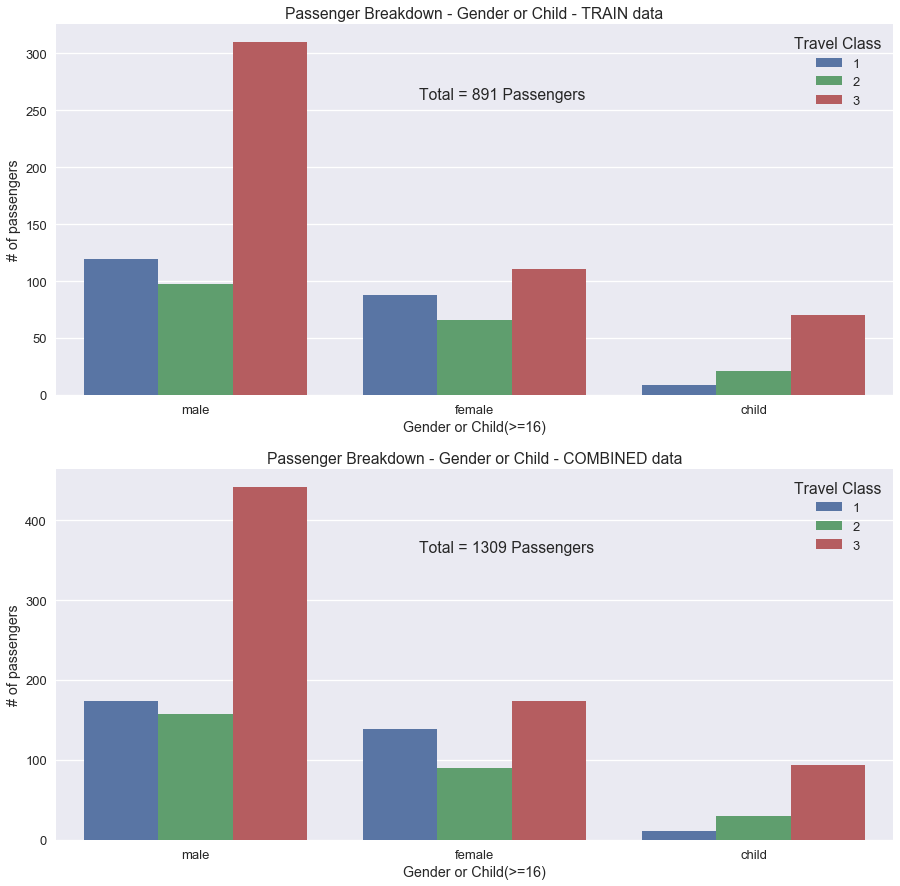

In [9]:
data_1 = titanic_data
data_2 = titanic_data_combine

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,15))

sns.countplot(x='sex_or_child', hue="Pclass", data=data_1, ax=ax1)
ax1.set_xlabel('Gender or Child(>=16)')
ax1.set_ylabel('# of passengers')
ax1.set_title('Passenger Breakdown - Gender or Child - TRAIN data')
ax1.legend(title = 'Travel Class')

ax1.text(0.8,260, 'Total = %0.0f Passengers'%len(data_1) )


sns.countplot(x='sex_or_child', hue="Pclass", data=data_2, ax=ax2)
ax2.set_xlabel('Gender or Child(>=16)')
ax2.set_ylabel('# of passengers')
ax2.set_title('Passenger Breakdown - Gender or Child - COMBINED data')
ax2.legend(title = 'Travel Class')

ax2.text(0.8,360, 'Total = %0.0f Passengers'%len(data_2) )

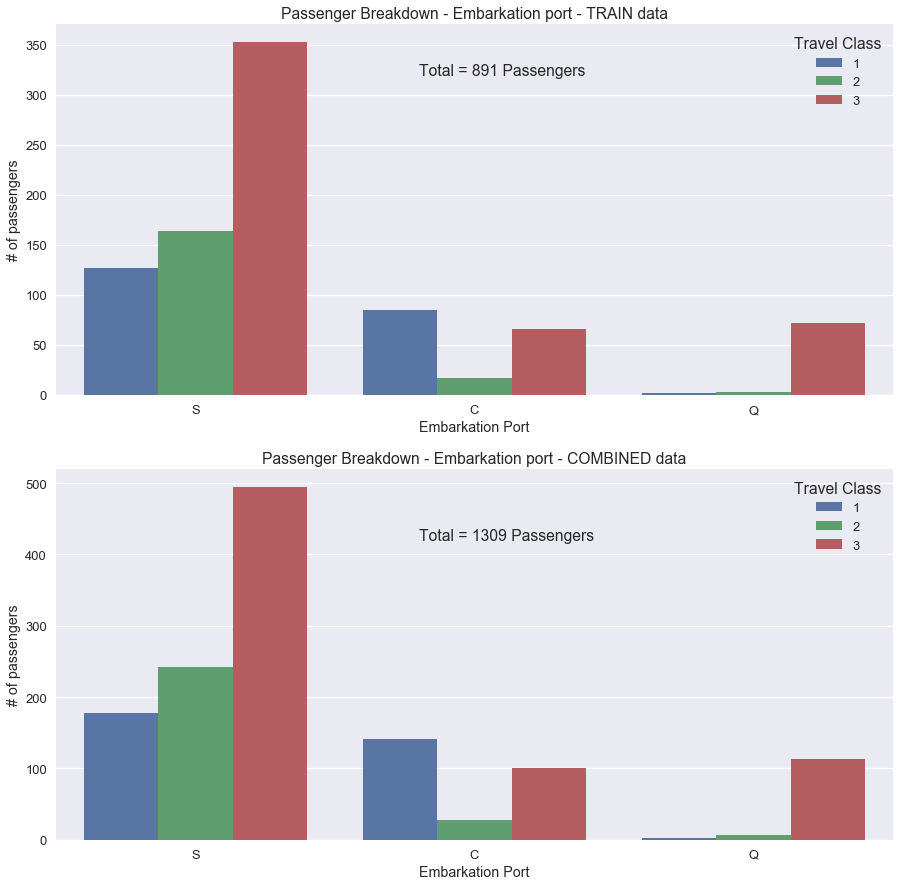

In [10]:
data_1 = titanic_data
data_2 = titanic_data_combine

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,15))

sns.countplot(x='Embarked', hue="Pclass", data=data_1, ax=ax1)
ax1.set_xlabel('Embarkation Port')
ax1.set_ylabel('# of passengers')
ax1.set_title('Passenger Breakdown - Embarkation port - TRAIN data')
ax1.legend(title = 'Travel Class')

ax1.text(0.8,320, 'Total = %0.0f Passengers'%len(data_1) )


sns.countplot(x='Embarked', hue="Pclass", data=data_2, ax=ax2)
ax2.set_xlabel('Embarkation Port')
ax2.set_ylabel('# of passengers')
ax2.set_title('Passenger Breakdown - Embarkation port - COMBINED data')
ax2.legend(title = 'Travel Class')

ax2.text(0.8,420, 'Total = %0.0f Passengers'%len(data_2) )



##  Survival - A first look

Of the 891 passengers, 342 survived and 549 perished.

A more detailed breakdown of survived vs. died (and total) for passengers by class and male/female/child is shown in the table & chart below.

Of the 891 passengers in the data 342 survived and 549 died


Survived   Died  Total_count
Pclass sex_or_child                              
1      child                8    1.0            9
       female              86    2.0           88
       male                42   77.0          119
2      child               19    2.0           21
       female              60    6.0           66
       male                 8   89.0           97
3      child               28   42.0           70
       female              54   57.0          111
       male                37  273.0          310

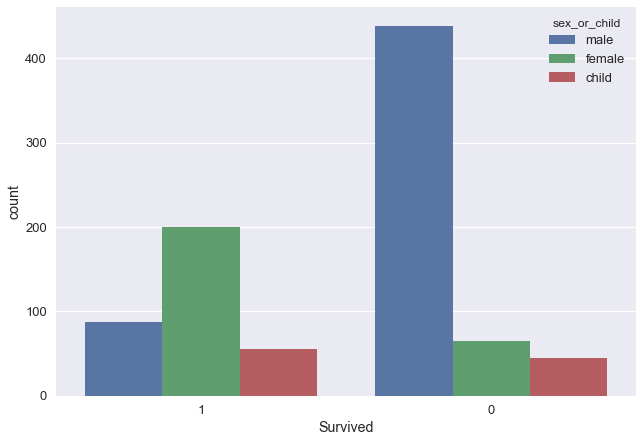

In [11]:
data_select = titanic_data[[
    'sex_or_child', 'Pclass', 'Survived','Died', 'Total_count']]

data_select_2 = data_select.set_index(['Pclass','sex_or_child'])

print('Of the 891 passengers in the data '+str(data_select['Survived'].sum())+' survived and '
      +str(data_select['Died'].sum())+' died' )


display(data_select_2.groupby(['Pclass','sex_or_child']).sum())

sns.countplot(x='Survived', hue="sex_or_child", data=titanic_data, order=[1,0], alpha =1)



### "Women and children first!"

Following the folk memory of 'Women and Children first', the first thing to investigate is whether women and children did indeed have a greate chance of surviving than men. And also to see whether travel class is a significant factor.

The upper plot below paints a pretty clear picture - for 1st and 2nd class passengers, being a woman or child almost guaranteed survival (>90%). For third class passengers it was not safe, but did increase survival chances (to c. 48%) vs. men from the same travel class (c.12%). 

Even 3rd class female pax (48%) were more likely to survive than 1st class male pax (35%). 2nd and 3rd class male pax stood little chance (8% amd 12% respectively).

Survival odds for children are similar to women from the same travel class - suggesting that 'Women and children first' was generally observed.


### Luckier to embark in Cherbourg?

There is some evidence that joining the Titanic at Cherbourg was luckier than Southampton. (Data is too sparse for Queenstown to really include in this analysis). Separated by travel class, and only considering male pax, there deos seem to be a greater chance of survival if you joined at Cherbourg.


In [12]:
display(titanic_data.groupby(['sex_or_child', 'Pclass'])['Survived'].mean())
display(titanic_data.groupby(['Pclass', 'Embarked', 'sex_or_child'])['Survived'].mean())

sex_or_child  Pclass
child         1         0.888889
              2         0.904762
              3         0.400000
female        1         0.977273
              2         0.909091
              3         0.486486
male          1         0.352941
              2         0.082474
              3         0.119355
Name: Survived, dtype: float64

Pclass  Embarked  sex_or_child
1       C         child           1.000000
                  female          0.976190
                  male            0.404762
        Q         female          1.000000
                  male            0.000000
        S         child           0.875000
                  female          0.976744
                  male            0.328947
2       C         child           1.000000
                  female          1.000000
                  male            0.111111
        Q         female          1.000000
                  male            0.000000
        S         child           0.888889
                  female          0.898305
                  male            0.080460
3       C         child           0.733333
                  female          0.500000
                  male            0.205128
        Q         child           0.428571
                  female          0.700000
                  male            0.085714
        S         child

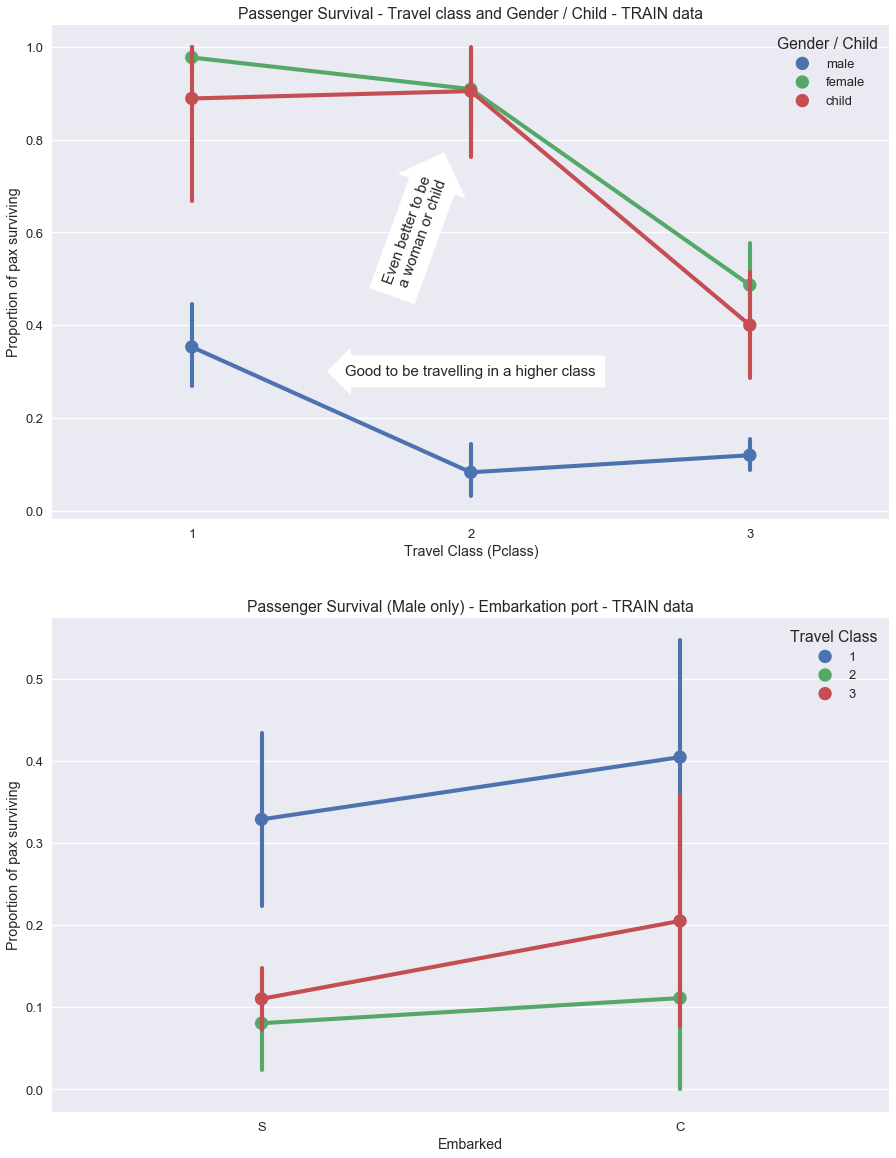

In [13]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,20))
                          

sns.pointplot(x='Pclass',y='Survived', hue='sex_or_child', data=titanic_data, size=5, alpha=0.6, ax=ax1)
ax1.set_xlabel('Travel Class (Pclass)')
ax1.set_ylabel('Proportion of pax surviving')
ax1.set_title('Passenger Survival - Travel class and Gender / Child - TRAIN data')
ax1.legend(title = 'Gender / Child')

# adding the box arrows
bbox_props_1 = dict(boxstyle="larrow,pad=0.6", fc="w", ec="gray", lw=0)
t = ax1.text(1, 0.30, "Good to be travelling in a higher class", ha="center", va="center", rotation=0,
            size=15, bbox=bbox_props_1)

bbox_props_2 = dict(boxstyle="rarrow,pad=0.6", fc="w", ec="gray", lw=0)
t = ax1.text(0.8, 0.6, "Even better to be\n a woman or child", ha="center", va="center", rotation=70,
            size=15, bbox=bbox_props_2)

    
    
data_exQ_male = titanic_data.loc[titanic_data['Embarked']!='Q'].loc[titanic_data['sex_or_child']=='male']
    
sns.pointplot(x='Embarked',y='Survived', hue='Pclass', data=data_exQ_male, size=5, alpha=0.6, ax=ax2)
ax2.set_xlabel('Embarked')
ax2.set_ylabel('Proportion of pax surviving')
ax2.set_title('Passenger Survival (Male only) - Embarkation port - TRAIN data')
ax2.legend(title = 'Travel Class')

# HANDLING MISSING DATA

## A little ticketing mystery -missing ticket numbers

There are 4 pax with 'LINE' for 'Ticket'. These are slightly odd cases once investiged in the 'Encyclopedia Titanica' (ET). It appears all 4 men were employees of the 'American Line' shipping company (based in Philadelphia, USA), and were travelling back to the USA on the Titanic - possibly as a result of the cancellation of the sailing of the American Line ship SS Philedelphia (as a result of a coal strike). They were all on the same ticket number (370160), which may have been complementery (see reference in bio below), and may have been part of some agreement between the American and White Star shipping lines for transporting crew.

WH Johnson - https://www.encyclopedia-titanica.org/titanic-victim/william-cahoone-johnson.html

WH Tornquist - https://www.encyclopedia-titanica.org/titanic-survivor/william-henry-tornquist.html

L Leonard (correct name AJ Shannon) - https://www.encyclopedia-titanica.org/titanic-victim/lionel-leonard.html

A Johnson (listed as Alfred, correct name August) - https://www.encyclopedia-titanica.org/titanic-victim/alfred-johnson.html

Of the 4 men, only WH Tornquist survived.

As this is not *strictly* in scope of the data science project, I have left the ticket number as 'LINE' in the data.


In [14]:
titanic_data.loc[titanic_data['Ticket']=='LINE'].sort_values('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,embarked_Q,sex_or_child,family_size,fare_per_family_member,title_raw,title_clean,ticket_clean,pax_on_ticket,survivors_on_ticket,fare_per_ticket_pax
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,...,False,male,1,0.0,Mr,Mr,None,NaN,NaN,NaN
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,...,False,male,1,0.0,Mr,Mr,None,NaN,NaN,NaN
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,...,False,male,1,0.0,Mr,Mr,None,NaN,NaN,NaN
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,...,False,male,1,0.0,Mr,Mr,None,NaN,NaN,NaN


## Where did they get on? - missing embarkation data

Two 1st Class passengers (ticket \#113572) have no embarkation port listed.

Unlike for other passenger classes, there is a less clear preference for 'S' (Southampton) over 'C' (Cherbourg) for 1st Class passengers. So there is no 'natural' assumption for where these passengers joined the ship.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,embarked_Q,sex_or_child,family_size,fare_per_family_member,title_raw,title_clean,ticket_clean,pax_on_ticket,survivors_on_ticket,fare_per_ticket_pax
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,...,False,female,1,80.0,Miss,Miss,113572,2.0,2.0,40.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,...,False,female,1,80.0,Mrs,Mrs,113572,2.0,2.0,40.0


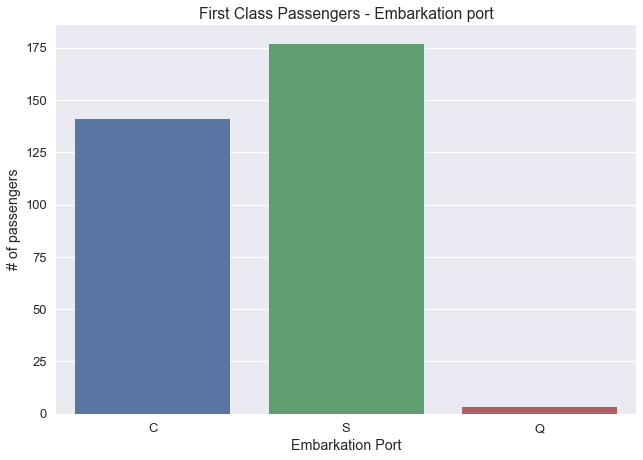

In [15]:
display(titanic_data.loc[titanic_data['Embarked'].isnull()==True])

data = titanic_data_combine.loc[titanic_data_combine['Pclass']==1]
sns.countplot(x='Embarked', data=data)
plt.xlabel('Embarkation Port')
plt.ylabel('# of passengers')
plt.title('First Class Passengers - Embarkation port')

Perhaps their fare can help?

A comparison of the 'per passenger' fare with distributions of fare from other 1st Class ticket holders show that the the 'per passenger' fare for this ticket (£40) is exactly on the median of the 'per passenger' fare for 1st class passengers boarding the Titanic at Calais (C). 

But when the combined dataset is considered, the picture is much less clear, and the fare for this ticket lies outside the central quartiles for both embarkation 'S' and 'C'. A comparison of the fare with the overall distribution of fares for 1st class passengers shows that the fare matches the higher price 'peak' of the bimodal distribution of 1st class fares (on a per pax basis).

Ultimately, I would say the data on this point is ambiguious, and you cannot draw a clear conclusion of embarkation point from this data alone.

(*NOTE* Once again the EB can give us the truth - the passengers boarded at Southampton, a lady and her maid. https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html )


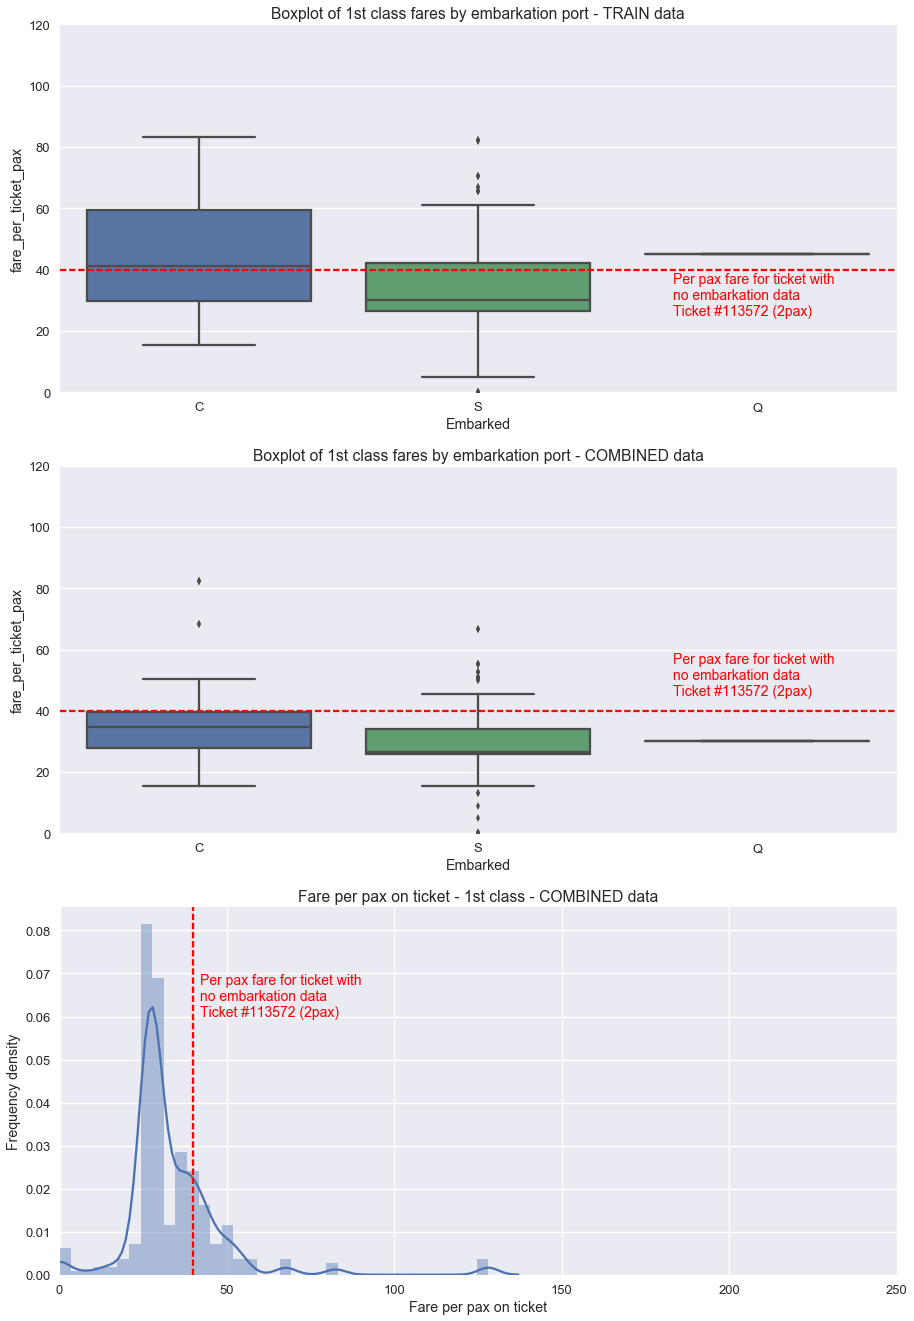

In [16]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,23))


ax1 = sns.boxplot(y=titanic_data.loc[titanic_data['Pclass']==1].loc
             [titanic_data['fare_per_ticket_pax'].isnull()==False]['fare_per_ticket_pax'], 
            x=titanic_data.loc[titanic_data['Pclass']==1]['Embarked'], ax=ax1)

ax1.set_ylim([0,120])

ax1.set_title('Boxplot of 1st class fares by embarkation port - TRAIN data')

ax1.text(1.7,25,'Per pax fare for ticket with \nno embarkation data\nTicket #113572 (2pax)', color='r', size=14, weight=200)
no_embark_med = titanic_data.loc[titanic_data['Pclass']==1].loc[
    titanic_data['Embarked'].isnull()==True]['fare_per_ticket_pax'].mean()

ax1.axhline(no_embark_med, linestyle = '--', color='r')


ax2 = sns.boxplot(y=titanic_data_combine.loc[titanic_data_combine['Pclass']==1].loc
             [titanic_data_combine['fare_per_ticket_pax'].isnull()==False]['fare_per_ticket_pax'], 
            x=titanic_data_combine.loc[titanic_data_combine['Pclass']==1]['Embarked'], ax=ax2)

ax2.set_ylim([0,120])

ax2.set_title('Boxplot of 1st class fares by embarkation port - COMBINED data')

ax2.text(1.7,45,'Per pax fare for ticket with \nno embarkation data\nTicket #113572 (2pax)', color='r', size=14, weight=200)
no_embark_med = titanic_data.loc[titanic_data['Pclass']==1].loc[
    titanic_data['Embarked'].isnull()==True]['fare_per_ticket_pax'].mean()

ax2.axhline(no_embark_med, linestyle = '--', color='r')

ax3 = sns.distplot(titanic_data_combine.loc[titanic_data_combine['Pclass']==1].loc
             [titanic_data_combine['fare_per_ticket_pax'].isnull()==False]['fare_per_ticket_pax'], ax=ax3)

ax3.set_xlabel('Fare per pax on ticket')
ax3.set_ylabel('Frequency density')
ax3.set_title('Fare per pax on ticket - 1st class - COMBINED data')
ax3.set(xlim=(0, 250))
ax3.axvline(no_embark_med, linestyle = '--', color='r')
ax3.text(42,0.06,'Per pax fare for ticket with \nno embarkation data\nTicket #113572 (2pax)', color='r', size=14, weight=200)




## Were they children? - missing age data (/ child status)

Let's have a look at ths missing ages:

In [17]:
display(titanic_data.loc[titanic_data['Age'].isnull() == True].describe())
display(titanic_data_combine.loc[titanic_data_combine['Age'].isnull() == True].describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Total_count,family_size,fare_per_family_member,pax_on_ticket,survivors_on_ticket,fare_per_ticket_pax
count,177.000000,177.000000,177.000000,0.0,177.000000,177.000000,177.000000,177.0,177.000000,177.000000,177.000000,177.000000,177.000000
mean,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567,1.0,1.745763,15.940015,1.672316,0.508475,13.976011
std,250.552901,0.456787,0.763216,NaN,1.626316,0.534145,31.874608,0.0,2.052658,27.236320,1.486673,0.905279,20.154358
min,6.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000
25%,230.000000,0.000000,3.000000,NaN,0.000000,0.000000,7.750000,1.0,1.000000,7.229200,1.000000,0.000000,7.733300
50%,452.000000,0.000000,3.000000,NaN,0.000000,0.000000,8.050000,1.0,1.000000,7.829200,1.000000,0.000000,7.895800
75%,634.000000,1.000000,3.000000,NaN,0.000000,0.000000,24.150000,1.0,1.000000,9.983350,2.000000,1.000000,11.625000
max,889.000000,1.000000,3.000000,NaN,8.000000,2.000000,227.525000,1.0,11.000000,227.525000,7.000000,5.000000,221.779200


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family_size,fare_per_family_member,pax_on_ticket,survivors_on_ticket,fare_per_ticket_pax
count,263.000000,177.000000,263.000000,0.0,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,197.000000,263.000000
mean,653.558935,0.293785,2.642586,NaN,0.482890,0.243346,19.823319,1.726236,14.235363,1.961977,0.522843,10.951418
std,380.161812,0.456787,0.726812,NaN,1.448443,0.949941,27.550667,2.017376,23.084055,2.171660,0.945309,9.807871
min,6.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,335.500000,0.000000,3.000000,NaN,0.000000,0.000000,7.750000,1.000000,7.229200,1.000000,0.000000,7.229200
50%,630.000000,0.000000,3.000000,NaN,0.000000,0.000000,8.050000,1.000000,7.750000,1.000000,0.000000,7.750000
75%,999.500000,1.000000,3.000000,NaN,0.000000,0.000000,22.804150,1.000000,8.560400,2.000000,1.000000,8.050000
max,1309.000000,1.000000,3.000000,NaN,8.000000,9.000000,227.525000,11.000000,227.525000,11.000000,5.000000,66.825000


I am not going to attempt to estimate missing ages. But I think it is reasonable to try and identify likely children (<=16) from among those without age data, based on the range of other data we have available.

For boys it is easy, the title Master' was specifically used by children, and so any male with the title 'Master' is almost certainly a child.

It's more complicated for girls, but there are indicators we can use o progressively filter out females who are almost certainly adults. If the title is 'Miss' (as opposed to Mrs. - always an adult), and Parch >0 (no child would travel without at least one parent), and pax_on_ticket > 2 (a cautious rule, but means a group of at least 3 travelling) and family_size >2 (largely eliminates couples with no children).

Running this ruleset identifies 10 'likely' children in the training data, and a total of 17 'likely' children in the combined data.



In [18]:
def likely_child(row):
    if row['is_male'] == True:
        if row['title_clean'] == "Master":
            print ('found a boy', row ['ticket_clean'], row ['Name'])
            return True
        else:
            return False
    elif row['is_female'] == True:
        if row['title_clean'] == "Miss":
            if row['Parch']>0:
                if row['pax_on_ticket']>2:
                    if row['family_size']>2:
                        print('found a girl', row ['ticket_clean'], row ['Name'])
                        return True
                    else:
                        return False
                else:
                    return False
            else:
                return False
        else:
            return False
    else:
        return False
    


print ('TRAIN data')
titanic_data['is_child_likely'] =  titanic_data.loc[titanic_data['Age'].isnull()==True].apply(likely_child, axis=1)    

print ('\nCOMBINE data')
titanic_data_combine['is_child_likely'] =  titanic_data_combine.loc[titanic_data_combine['Age'].isnull()==True].apply(likely_child, axis=1)    
    
#titanic_data_combine.loc[titanic_data_combine['is_child_likely']==True]    

TRAIN data
found a boy 2661 Moubarek, Master. Gerios
found a boy 2343 Sage, Master. Thomas Henry
found a boy 4133 Lefebre, Master. Henry Forbes
found a girl 2343 Sage, Miss. Constance Gladys
found a girl 4133 Lefebre, Miss. Mathilde
found a girl 4133 Lefebre, Miss. Ida
found a girl 4133 Lefebre, Miss. Jeannie
found a boy 2661 Moubarek, Master. Halim Gonios ("William George")
found a girl 2343 Sage, Miss. Stella Anna
found a girl 2343 Sage, Miss. Dorothy Edith "Dolly"

COMBINE data
found a boy 2661 Moubarek, Master. Gerios
found a girl 2668 Peter, Miss. Anna
found a boy 2343 Sage, Master. Thomas Henry
found a boy 4133 Lefebre, Master. Henry Forbes
found a girl 2343 Sage, Miss. Constance Gladys
found a girl 4133 Lefebre, Miss. Mathilde
found a girl 4133 Lefebre, Miss. Ida
found a girl 4133 Lefebre, Miss. Jeannie
found a boy 2661 Moubarek, Master. Halim Gonios ("William George")
found a girl 2343 Sage, Miss. Stella Anna
found a girl 2343 Sage, Miss. Dorothy Edith "Dolly"
found a girl 6607

In [19]:
def is_child_assume(row):
    if row['is_child_def'] == True or row['is_child_likely'] == True:
        return True
    else:
        return False

titanic_data['is_child_assume'] = titanic_data.apply(is_child_assume, axis=1)        

titanic_data[['PassengerId','Survived','Pclass', 'Name', 'is_child_def', 'is_child_likely',  'is_child_assume']].loc[
    titanic_data['Age'].isnull()==True].loc[
    titanic_data['is_child_likely']==True]
    

,PassengerId,Survived,Pclass,Name,is_child_def,is_child_likely,is_child_assume
65,66,1,3,"Moubarek, Master. Gerios",False,True,True
159,160,0,3,"Sage, Master. Thomas Henry",False,True,True
176,177,0,3,"Lefebre, Master. Henry Forbes",False,True,True
180,181,0,3,"Sage, Miss. Constance Gladys",False,True,True
229,230,0,3,"Lefebre, Miss. Mathilde",False,True,True
409,410,0,3,"Lefebre, Miss. Ida",False,True,True
485,486,0,3,"Lefebre, Miss. Jeannie",False,True,True
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",False,True,True
792,793,0,3,"Sage, Miss. Stella Anna",False,True,True
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",False,True,True


In [20]:
# repeat for combined dataset
titanic_data_combine['is_child_assume'] = titanic_data_combine.apply(is_child_assume, axis=1)        

titanic_data_combine[['PassengerId','Survived','Pclass', 'Name', 'is_child_def', 'is_child_likely',  'is_child_assume']].loc[
    titanic_data_combine['Age'].isnull()==True].loc[
    titanic_data_combine['is_child_likely']==True]

,PassengerId,Survived,Pclass,Name,is_child_def,is_child_likely,is_child_assume
65,66,1.0,3,"Moubarek, Master. Gerios",False,True,True
128,129,1.0,3,"Peter, Miss. Anna",False,True,True
159,160,0.0,3,"Sage, Master. Thomas Henry",False,True,True
176,177,0.0,3,"Lefebre, Master. Henry Forbes",False,True,True
180,181,0.0,3,"Sage, Miss. Constance Gladys",False,True,True
229,230,0.0,3,"Lefebre, Miss. Mathilde",False,True,True
409,410,0.0,3,"Lefebre, Miss. Ida",False,True,True
485,486,0.0,3,"Lefebre, Miss. Jeannie",False,True,True
709,710,1.0,3,"Moubarek, Master. Halim Gonios (""William George"")",False,True,True
792,793,0.0,3,"Sage, Miss. Stella Anna",False,True,True


In [21]:
#Adding a sex_or_child_impute column - populated male, female, child - based 'is_child_assume' status
def sex_or_child_impute (row):
    if row['is_child_assume'] is True:
        return 'child'
    else:
        return row['Sex']
    
titanic_data['sex_or_child_impute'] =  titanic_data.apply(sex_or_child_impute, axis=1)
titanic_data_combine['sex_or_child_impute'] =  titanic_data_combine.apply(sex_or_child_impute, axis=1)


### Impact of 'imputed' child status on survival chances?

What effect does this 're-classification' of these 10 individuals in te 'Train' data as likely children have on the survival probabilities from above? As most of them did not survive (and were 3rd class), the main changes are:
- Survival % for 3rd class children fall sfrom 40% to 37.5%
- Survival % for 3rd class female adults rises from 48.6% to 51.4%





sex_or_child  Pclass
child         1         0.888889
              2         0.904762
              3         0.400000
female        1         0.977273
              2         0.909091
              3         0.486486
male          1         0.352941
              2         0.082474
              3         0.119355
Name: Survived, dtype: float64

sex_or_child_impute  Pclass
child                1         0.888889
                     2         0.904762
                     3         0.375000
female               1         0.977273
                     2         0.909091
                     3         0.514286
male                 1         0.352941
                     2         0.082474
                     3         0.114379
Name: Survived, dtype: float64

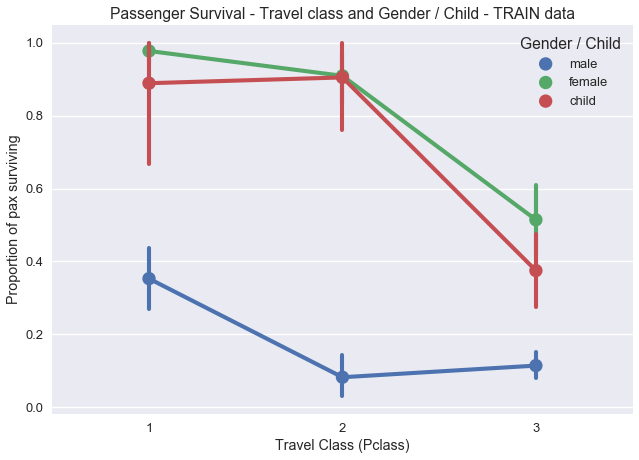

In [22]:
display(titanic_data.groupby(['sex_or_child', 'Pclass'])['Survived'].mean())
display(titanic_data.groupby(['sex_or_child_impute', 'Pclass'])['Survived'].mean())
sns.pointplot(x='Pclass',y='Survived', hue='sex_or_child_impute', data=titanic_data, size=5, alpha=0.6)
plt.xlabel('Travel Class (Pclass)')
plt.ylabel('Proportion of pax surviving')
plt.title('Passenger Survival - Travel class and Gender / Child - TRAIN data')
plt.legend(title = 'Gender / Child')




# PASSENGER AGE DISTRIBUTION


##  Passenger Age distribution - Adults

Given the observations above about the strong effect of gender, child status and passenger class on survival rates, it makes sense to look at other data segmented into these groups, to see whethr other factors had a sigificant effect on survival odds *within* each segment.

First, let's take a look at the age distribution profiles for the different populations of adult (.>16) men & women segmented by travel class (1,2,3) - the plots are shown below.

The plots show a very clear pattern:
- As the travel class improves (from 3rd to 3nd to 1st), both the average age and the standard deviation of the age distribution increase.
- For all travel classes, women show a lower average age than men - though the difference is larger (36.2F vs. 42.4M) in First class.

To broadly characterise:
- Third class passengers tended to be younger (mostly < 35) with few passengers >40
- First class passengers show a higher average age, and a much broader distribution, with plenty of passengers >40

This distribution of probably somewhat indicative of Victoria Society as a whole, with 3rd class passengers more likely to be economic migrants, and 1st class likely to be travelling for pleasure. It would be interesting to know the %'s of each group holding single vs. one-way tickets.



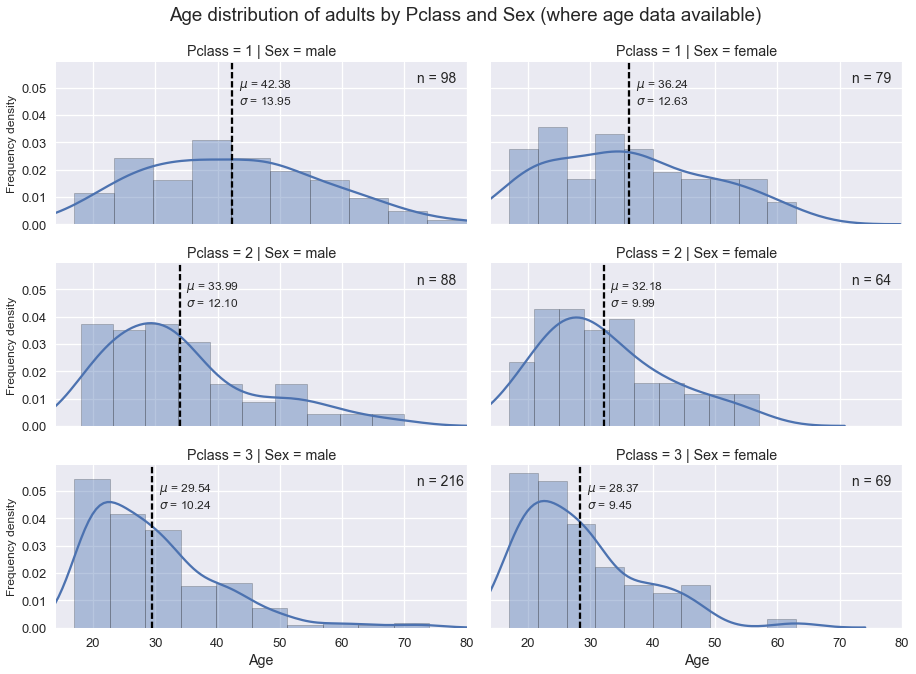

In [23]:
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid')
grid = sns.FacetGrid(titanic_data.loc[titanic_data['is_child_def'] == False], col='Sex', row = 'Pclass' ,size=3.2, aspect=2)
grid.map(sns.distplot, 'Age', bins=10, norm_hist=True, kde=True, hist_kws={'linewidth':0.5,'edgecolor':'k','linestyle':'-'})
grid.set(xlim=(14, titanic_data['Age'].max()))
#grid.add_legend()

# Add vertical lines for mean age on each plot, and labels with mean & std for relevant population
# r'$...$' enables Latex notation (r is BEFORE string '  ' ), but need to switch back to unicode (u) for \n character
def vertical_mean_line(x, **kwargs):
    plt.axvline(x.mean(), linestyle = '--', color = 'k')
    plt.text(x.mean()+1, 0.045, r'$\mu$ = '+str('%.2f'%x.mean())+u'\n'+r'$\sigma$ = '+str('%.2f'%x.std()), size=12)


grid.map(vertical_mean_line, 'Age') 

# Add text to each plot for relevant popultion size
for row in range(grid.axes.shape[0]):
    grid.axes[row, 0].text(72, 0.052, 'n = '+str(titanic_data.loc[titanic_data['Pclass']==row+1].loc[titanic_data['is_child_def']==False].loc[titanic_data['Age'].isnull()==False]['is_male'].sum()), size = 14)
    grid.axes[row, 1].text(72, 0.052, 'n = '+str(titanic_data.loc[titanic_data['Pclass']==row+1].loc[titanic_data['is_child_def']==False].loc[titanic_data['Age'].isnull()==False]['is_female'].sum()), size = 14)

grid.set_ylabels('Frequency density', size=12)
    
# Squash down a little and add title to facetgrid    
plt.subplots_adjust(top=0.9)
grid.fig.suptitle('Age distribution of adults by Pclass and Sex (where age data available)')  


##  Passenger Age distribution - Children

There is less data available for children - especially in 1st and 2nd Class. But the data available indicates littls discernable / consistent distinction between gender and passenger class.


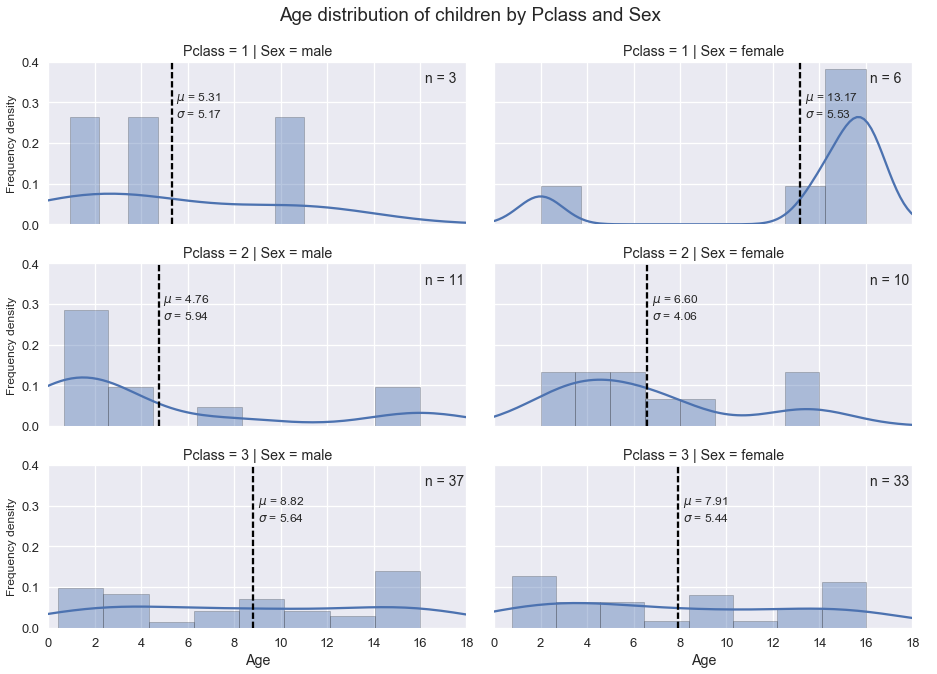

In [24]:
grid = sns.FacetGrid(titanic_data.loc[titanic_data['is_child_def'] == True], col='Sex', row = 'Pclass' ,size=3.2, aspect=2)
grid.map(sns.distplot, 'Age',bins=8, norm_hist=True, kde=True, hist_kws={'linewidth':0.5,'edgecolor':'k','linestyle':'-'})
grid.set(xlim=(0, 18))
grid.set_ylabels('Frequency density')
grid.add_legend()

# Add vertical lines for mean age on each plot, and labels with mean & std for relevant population
# r'$...$' enables Latex notation (r is BEFORE string '  ' )
def vertical_mean_line_child(x, **kwargs):
    plt.axvline(x.mean(), linestyle = '--', color = 'k')
    plt.text(x.mean()+.2, 0.27, r'$\mu$ = '+str('%.2f'%x.mean())+u'\n'+r'$\sigma$ = '+str('%.2f'%x.std()), size=12)
    
grid.map(vertical_mean_line_child, 'Age') 

# Add text to each plot for relevant popultion size
# NOTE - don't need to filter on ['Age'].isnull() for children, as 'is_child'=True only possible for children with 'Age' data
for row in range(grid.axes.shape[0]):
    grid.axes[row, 0].text(16.2, 0.35, 'n = '+str(titanic_data.loc[titanic_data['Pclass']==row+1].loc[titanic_data['is_child_def']==True]['is_male'].sum()), size = 14)
    grid.axes[row, 1].text(16.2, 0.35, 'n = '+str(titanic_data.loc[titanic_data['Pclass']==row+1].loc[titanic_data['is_child_def']==True]['is_female'].sum()), size = 14)

    
grid.set_ylabels('Frequency density', size=12) 
    
plt.subplots_adjust(top=0.9)
grid.fig.suptitle('Age distribution of children by Pclass and Sex')

##  Age distribution - survived vs. perished


The key question is:
'Given a particular gender and travel class, did passenger age have any discernable effect on survival?'

### Adults

The charts below show passenger age distribution profiles for adult men & women segmented by travel class (as above), but this time showing separate distributions for survived ('Survived' = 1) vs. perished ('Survived' = 0).

There is no consistent pattern, but a few indicative conclusions can be seen:
- First class women mostly survived - so there is little to conclude from the ages of the 2 who died
- First class men who survived were slightly younger on average (38.8) than those who died (44.6), with very few of the men >60 escaping. 
- Second class women who survived also show a lower average age (31.8) than those who died (36) - but again, only 6 women in this segment died.
- Second class men who survived actually show a slightly higher average age (36.7) than those who died (33.8) - though with only 6 men surviving, again it is hard to draw firm conclusions.
- For Third class men and women, survivors had a lower average age than those who died. For both sexes (but especially women) this appear due to the absence of most of the older passengers in the distribution from the survivors.

So it looks like age did matter, a little, if you were male or 3rd class. One is reminded of the stereotypes of the older passengers making way for the younger, who 'still had their lives ahead of them'. I wonder if that was really the case?


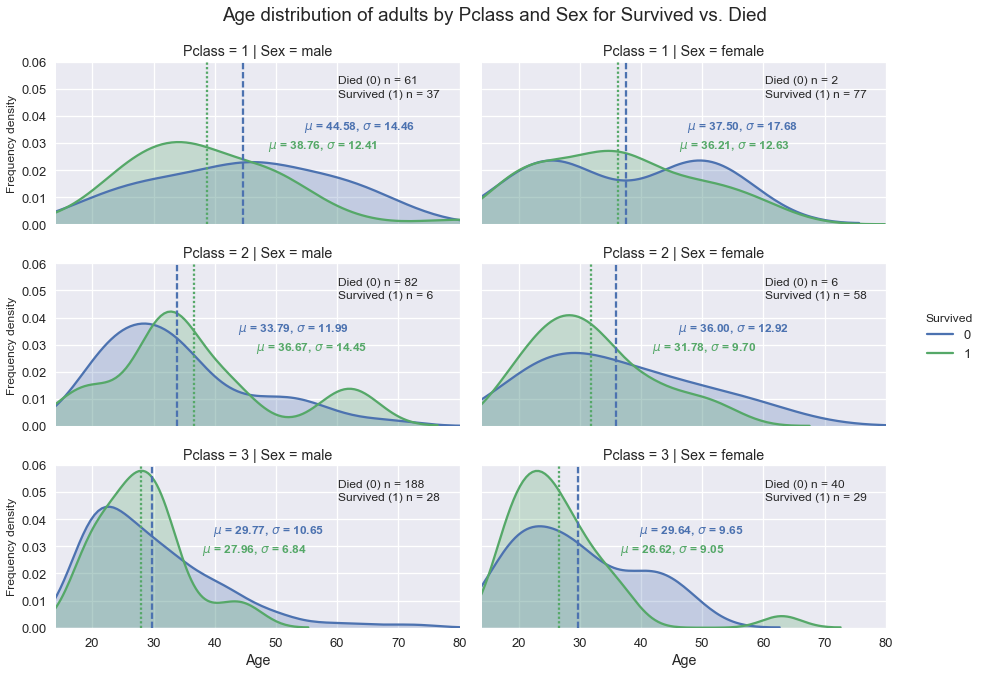

In [25]:
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid')
grid = sns.FacetGrid(titanic_data.loc[titanic_data['is_child_def'] == False], col='Sex', row = 'Pclass', hue='Survived' ,size=3.2, aspect=2)
grid.map(sns.kdeplot, 'Age', shade=True)
grid.set(xlim=(14, titanic_data['Age'].max()), ylim=(0,0.06))
grid.add_legend()
   
def vertical_mean_line_survived(x, **kwargs):
    ls = {'0':'--','1':(0, (1, 1))}
    plt.axvline(x.mean(), linestyle =ls[kwargs.get('label','0')], 
                color = kwargs.get('color','g')) 
    txkw = dict(size=12, color = kwargs.get('color', 'g'), weight=800) #rotation=90, backgroundcolor='w'
    tx = r'$\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(x.mean(),x.std())
    if kwargs.get('label') == '0':
        plt.text(x.mean()+10, 0.035, tx, **txkw)
    else:
        plt.text(x.mean()+10, 0.028, tx, **txkw)
        
# NOTE 2nd arguments on .get() are not required, they are default values in case of problem    
    
        
grid.map(vertical_mean_line_survived, 'Age') 

# Add text to each plot for relevant popultion size
# NOTE - don't need to filter on ['Age'].isnull() for children, as 'is_child'=True only possible for children with 'Age' data
for row in range(grid.axes.shape[0]):
    grid.axes[row, 0].text(60.2, 0.047, 'Survived (1) n = '+str(titanic_data.loc[titanic_data['Pclass']==row+1].loc[titanic_data['is_child_def']==False].loc[titanic_data['Age'].isnull()==False].loc[titanic_data['Survived']==1]['is_male'].sum()), size = 12)
    grid.axes[row, 1].text(60.2, 0.047, 'Survived (1) n = '+str(titanic_data.loc[titanic_data['Pclass']==row+1].loc[titanic_data['is_child_def']==False].loc[titanic_data['Age'].isnull()==False].loc[titanic_data['Survived']==1]['is_female'].sum()), size = 12)
    grid.axes[row, 0].text(60.2, 0.052, 'Died (0) n = '+str(titanic_data.loc[titanic_data['Pclass']==row+1].loc[titanic_data['is_child_def']==False].loc[titanic_data['Age'].isnull()==False].loc[titanic_data['Survived']==0]['is_male'].sum()), size = 12)
    grid.axes[row, 1].text(60.2, 0.052, 'Died (0) n = '+str(titanic_data.loc[titanic_data['Pclass']==row+1].loc[titanic_data['is_child_def']==False].loc[titanic_data['Age'].isnull()==False].loc[titanic_data['Survived']==0]['is_female'].sum()), size = 12)



grid.set_ylabels('Frequency density', size=12)
    
# Squash down a little and add title to facetgrid, and squash right to make legend look sensible   
plt.subplots_adjust(top=0.9, right=0.9)
grid.fig.suptitle('Age distribution of adults by Pclass and Sex for Survived vs. Died') 

### Children

There is less to conclude from the age distribtution of survived vs. perished for the child passengers, especially for First & Second class where there are two few data points to draw conclusions.

In third class, surviving boys were younger on average (6.3 vs. 9.7) than those who died, and there it is clear that older boys in this class (>=14) were largely absent from the survivors. Perhaps the threshold for 'adulthood' in this group of society was younger, so these individuals would be seen more as 'men' than children? Lots of children in Victorian England were in full time employment at 14 (often younger) - so it is possible.

There is little variation, though, in the surviving vs. perished populations of girls. Perhaps boys were expected to grow up quicker back then?

/Users/Chris/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/Chris/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/Chris/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/Chris/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


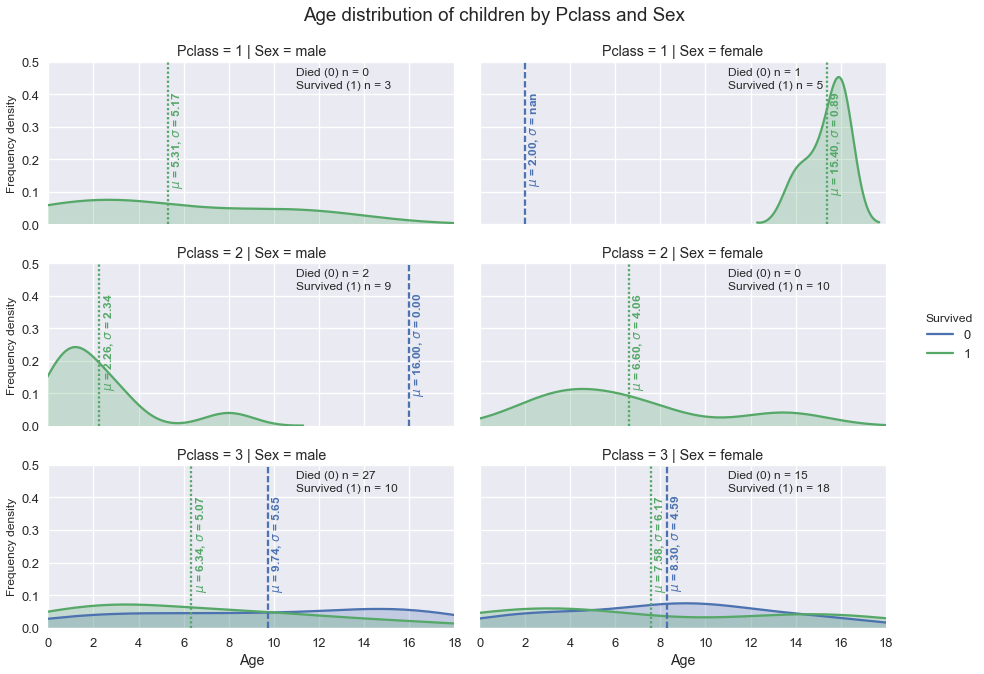

In [26]:
grid = sns.FacetGrid(titanic_data.loc[titanic_data['is_child_def'] == True], col='Sex', row = 'Pclass', hue='Survived' ,size=3.2, aspect=2)
grid.map(sns.kdeplot, 'Age', shade=True)
grid.set(xlim=(0, 18), ylim=(0, 0.5))
grid.set_ylabels('Frequency density')
grid.add_legend()

# Add vertical lines for mean age on each plot
#def vertical_mean_line_child_survived(x, **kwargs):
#    plt.axvline(x.mean(), linestyle = '--', color = 'g')
    #plt.text(x.mean()+.2, 0.3, 'mean = '+str('%.2f'%x.mean()), size=12)
    #plt.text(x.mean()+.2, 0.27, 'std = '+str('%.2f'%x.std()), size=12)

def vertical_mean_line_child_survived(x, **kwargs):
    ls = {'0':'--','1':(0, (1, 1))}
    place = {'0': -1, '1':1}
    plt.axvline(x.mean(), linestyle =ls[kwargs.get('label','0')], 
                color = kwargs.get('color','g')) 
    txkw = dict(size=12, color = kwargs.get('color', 'g'), weight=800, rotation=90) #rotation=90, backgroundcolor='w'
    tx = r'$\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(x.mean(),x.std())
    if kwargs.get('label') == '0':
        plt.text(x.mean()+.1, 0.38, tx, **txkw)
    else:
        plt.text(x.mean()+.1, 0.38, tx, **txkw)    
    
    
    
grid.map(vertical_mean_line_child_survived, 'Age') 

# Add text to each plot for relevant popultion size
# NOTE - don't need to filter on ['Age'].isnull() for children, as 'is_child'=True only possible for children with 'Age' data
for row in range(grid.axes.shape[0]):
    grid.axes[row, 0].text(11, 0.42, 'Survived (1) n = '+str(titanic_data.loc[titanic_data['Pclass']==row+1].loc[titanic_data['is_child_def']==True].loc[titanic_data['Survived']==1]['is_male'].sum()), size = 12)
    grid.axes[row, 1].text(11, 0.42, 'Survived (1) n = '+str(titanic_data.loc[titanic_data['Pclass']==row+1].loc[titanic_data['is_child_def']==True].loc[titanic_data['Survived']==1]['is_female'].sum()), size = 12)
    grid.axes[row, 0].text(11, 0.46, 'Died (0) n = '+str(titanic_data.loc[titanic_data['Pclass']==row+1].loc[titanic_data['is_child_def']==True].loc[titanic_data['Survived']==0]['is_male'].sum()), size = 12)
    grid.axes[row, 1].text(11, 0.46, 'Died (0) n = '+str(titanic_data.loc[titanic_data['Pclass']==row+1].loc[titanic_data['is_child_def']==True].loc[titanic_data['Survived']==0]['is_female'].sum()), size = 12)

    
grid.set_ylabels('Frequency density', size=12) 
    
plt.subplots_adjust(top=0.9, right=0.9)
grid.fig.suptitle('Age distribution of children by Pclass and Sex')

# FAMILY SIZE & PASSENGERS ON EACH TICKET

It is worth exploring the dynamics of family (or travelling party) size, and the impact on survival.

It is tempting to assume that 'family size' (as calculated from SibSp & Parch) and 'pax on ticket' (from ticket numbers) are broadly showing the same data (on the basis that most travelling groups are families travelling together). And broadly there is a good correlation between the two (Pearsonr = 0.802)

But as you can see from the plots below, there are enough exception cases to question this as a good modelling assumption. And investigation of the data yields plenty of cases where family_size != pax_on_ticket for good reasons:
- Adult siblings travelling together on different tickets
- Non-family (e.g. nannies) travelling with family on same ticket
- Groups of adult friends travelling together

We will take a look a this below in terms of impact on survival chance, but the 'going in' assumption is that perhaps 'pax_on_ticket' is a better indicator - as this defines the 'travelling group' who would most likely have been together at the time of the impact, and were probably working together to try and survive. Let's see.

In [27]:
data_select = titanic_data_combine[['family_size', 'pax_on_ticket']]
corr = data_select.corr()
corr

,family_size,pax_on_ticket
family_size,1.000000,0.802028
pax_on_ticket,0.802028,1.000000


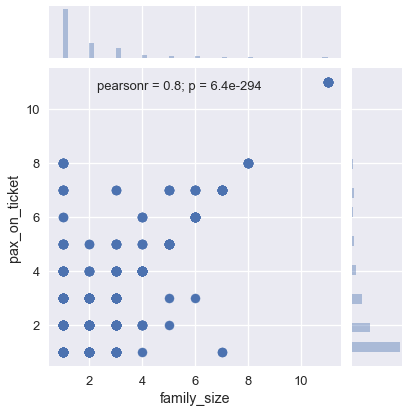

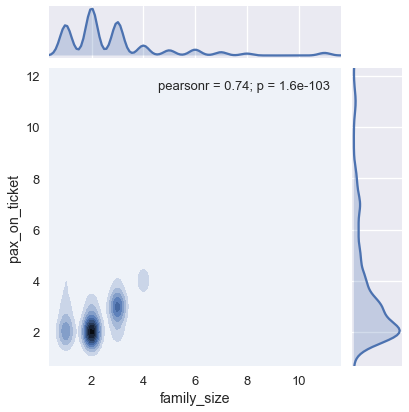

In [28]:
data_all = titanic_data_combine
data_no_solos = titanic_data_combine.loc[titanic_data_combine['pax_on_ticket']>1]

sns.jointplot(x='family_size', y='pax_on_ticket', data=data_all)

sns.jointplot(x='family_size', y='pax_on_ticket', data=data_no_solos, kind="kde")




Distributions of both family size and 'pax on ticket' are shown below split by class.

The main conclusion to note is that the numbers of 'smaller' groups (2,3 pax) on the same ticket is higher than the number of families of the same size. So there were plenty of small groups (and some larger groups) travelling together who were not 'families' under the 'SibSp, Parch' definition.


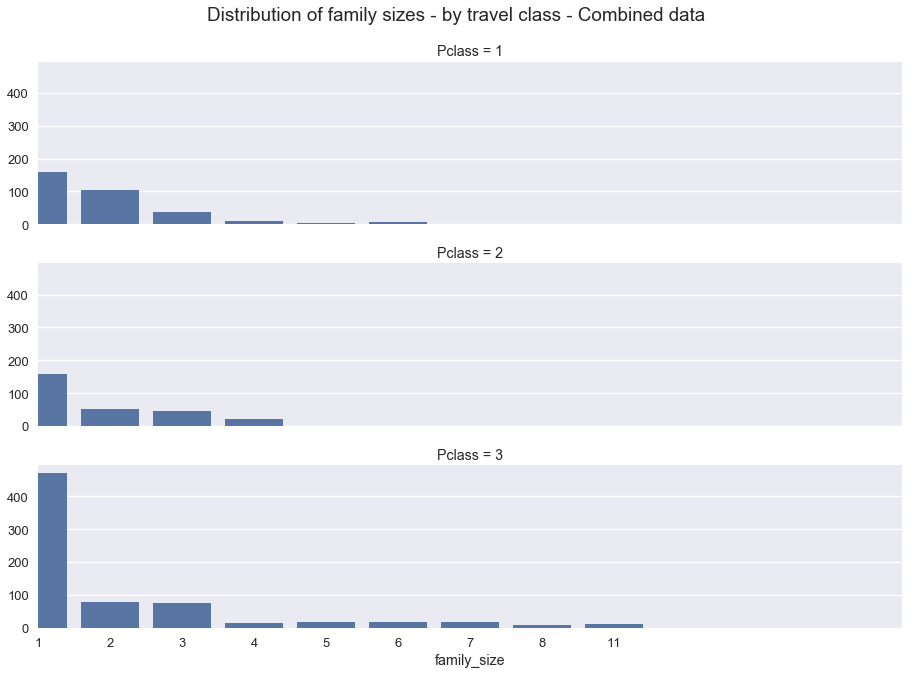

In [29]:
grid = sns.FacetGrid(titanic_data_combine, row = 'Pclass', size=3.2, aspect=4)
grid.map(sns.countplot, 'family_size')
grid.set(xlim=(0, 12),xticks=(list(range(12))))
grid.add_legend()

plt.subplots_adjust(top=0.9)
grid.fig.suptitle('Distribution of family sizes - by travel class - Combined data')

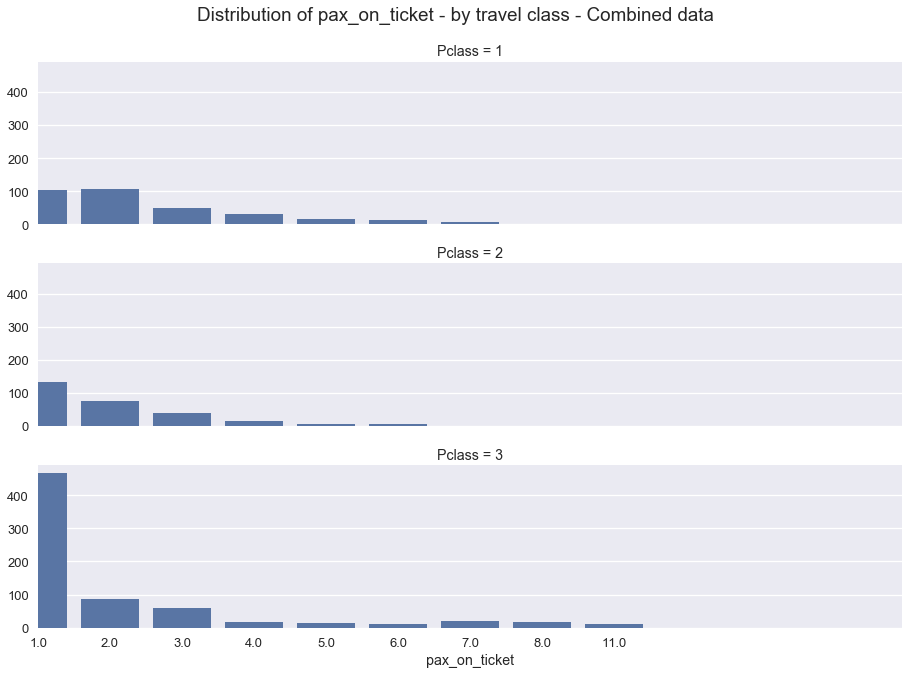

In [30]:
grid = sns.FacetGrid(titanic_data_combine, row = 'Pclass', size=3.2, aspect=4)
#grid.map(sns.countplot, 'pax_on_ticket')
grid.map(sns.countplot, 'pax_on_ticket')
grid.set(xlim=(0, 12),xticks=(list(range(12))))
grid.add_legend()

plt.subplots_adjust(top=0.9)
grid.fig.suptitle('Distribution of pax_on_ticket - by travel class - Combined data')

## Family Size - Impact on survival

The plots below show the impact of family size on the survival probability of male / female / child passengers - split by travel class.

Overall there is no clear pattern or impact - with the possible exception that larger families in 3rd class appeared to fare worse than smaller ones.

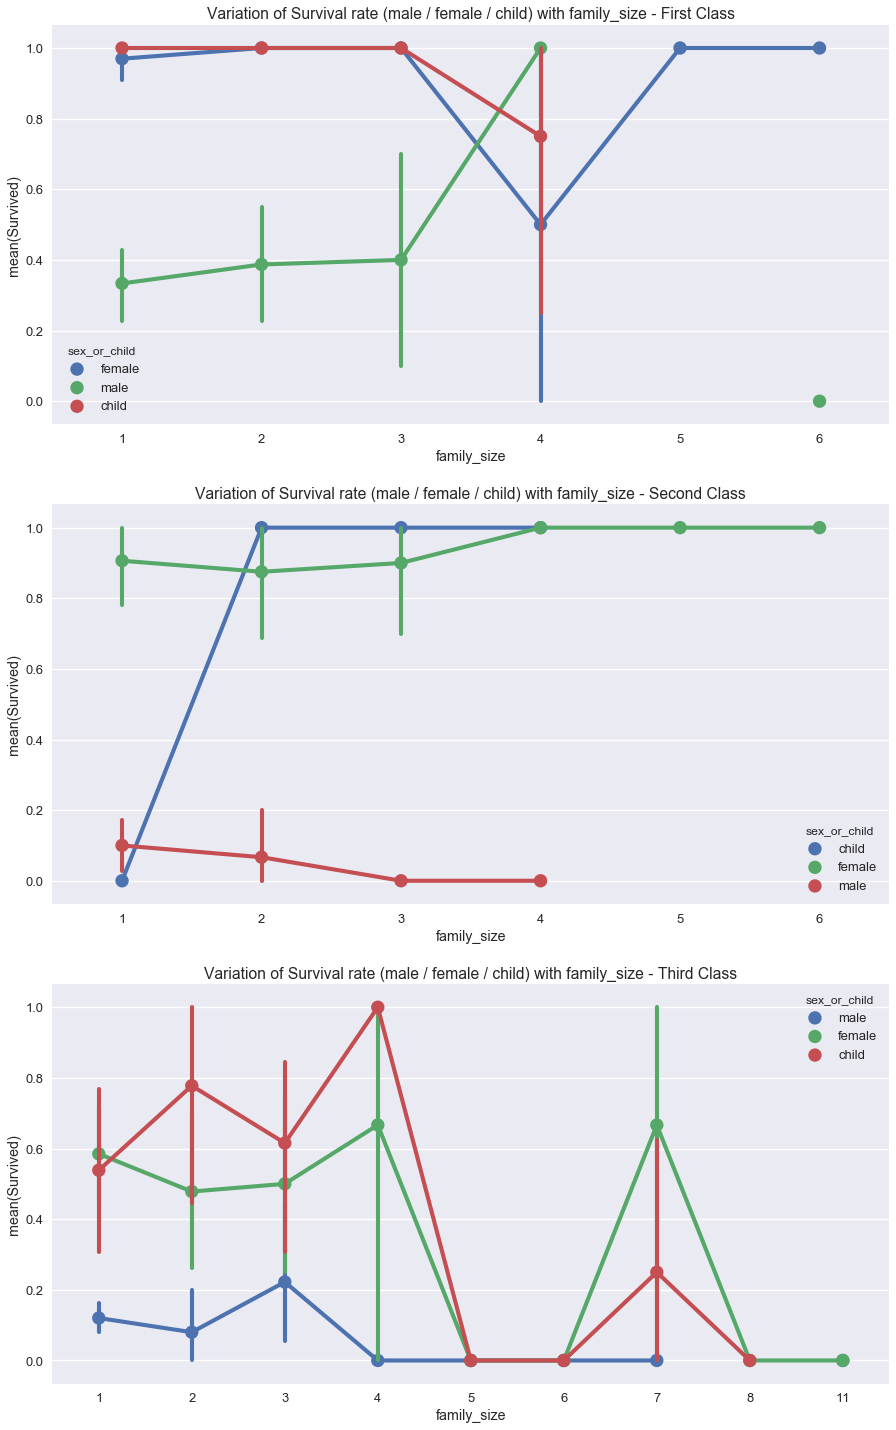

In [31]:
data_class_1 = titanic_data.loc[titanic_data['Pclass']==1]
data_class_2 = titanic_data.loc[titanic_data['Pclass']==2]
data_class_3 = titanic_data.loc[titanic_data['Pclass']==3]

fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(15,25))

sns.pointplot(x='family_size',y='Survived', hue='sex_or_child', data=data_class_1, size=5, alpha=0.6, ax=ax1)
sns.pointplot(x='family_size',y='Survived', hue='sex_or_child', data=data_class_2, size=5, alpha=0.6, ax=ax2)
sns.pointplot(x='family_size',y='Survived', hue='sex_or_child', data=data_class_3, size=5, alpha=0.6, ax=ax3)


ax1.set_title('Variation of Survival rate (male / female / child) with family_size - First Class')
ax2.set_title('Variation of Survival rate (male / female / child) with family_size - Second Class')
ax3.set_title('Variation of Survival rate (male / female / child) with family_size - Third Class')





## Pax on ticket - Impact on survival

The plots below show the impact of pax on ticket on the survival probability of male / female / child passengers - split by travel class.

This appears to show a slightly clearer relationship, with survival chances (especially for men) generally declining as the number of passengers on the ticket increased.

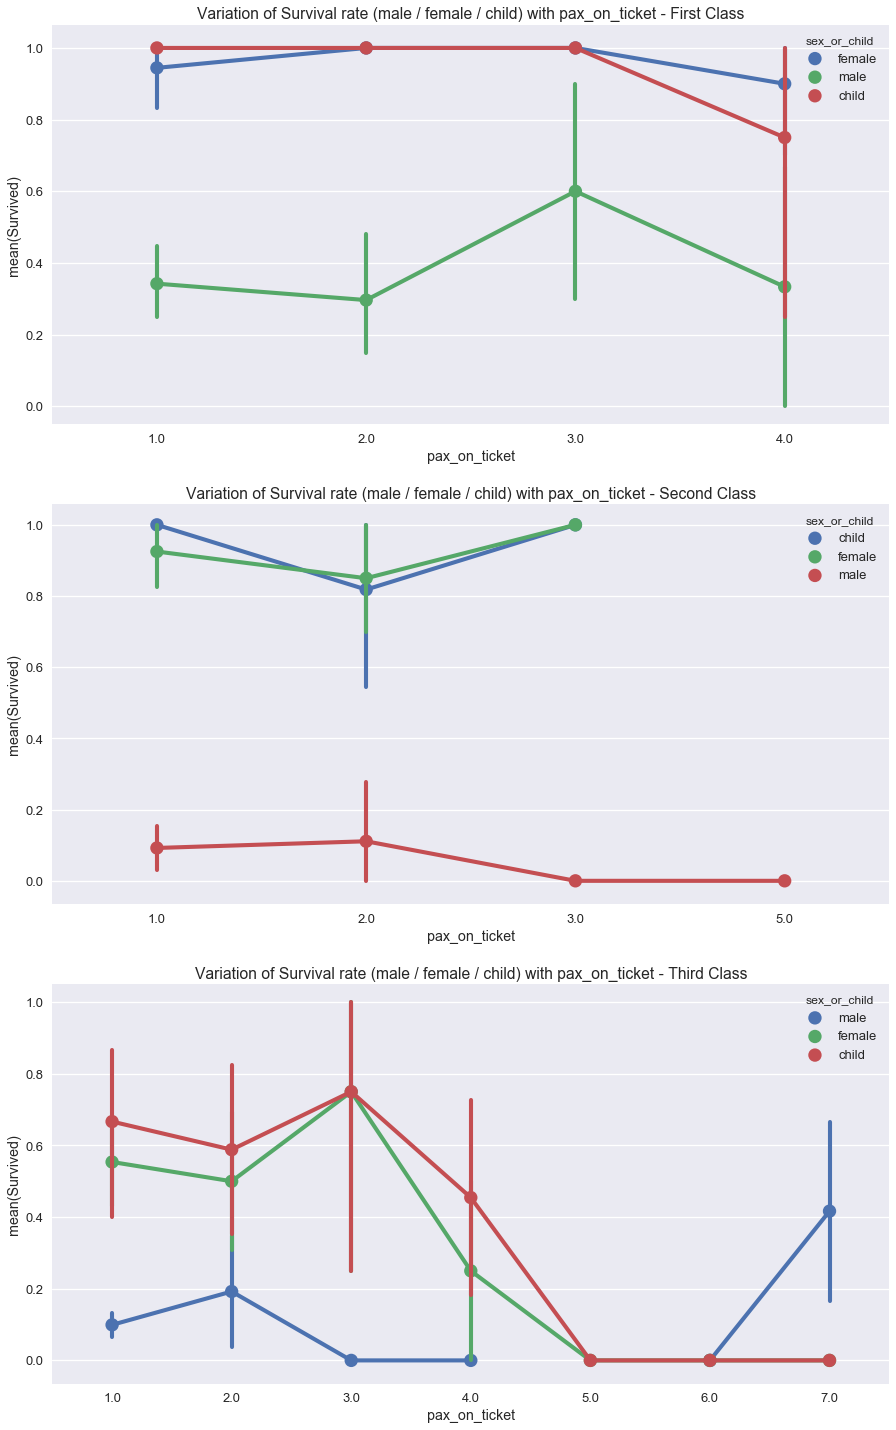

In [32]:
data_class_1 = titanic_data.loc[titanic_data['Pclass']==1]
data_class_2 = titanic_data.loc[titanic_data['Pclass']==2]
data_class_3 = titanic_data.loc[titanic_data['Pclass']==3]

fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(15,25))

sns.pointplot(x='pax_on_ticket',y='Survived', hue='sex_or_child', data=data_class_1, size=5, alpha=0.6, ax=ax1)
sns.pointplot(x='pax_on_ticket',y='Survived', hue='sex_or_child', data=data_class_2, size=5, alpha=0.6, ax=ax2)
sns.pointplot(x='pax_on_ticket',y='Survived', hue='sex_or_child', data=data_class_3, size=5, alpha=0.6, ax=ax3)


ax1.set_title('Variation of Survival rate (male / female / child) with pax_on_ticket - First Class')
ax2.set_title('Variation of Survival rate (male / female / child) with pax_on_ticket - Second Class')
ax3.set_title('Variation of Survival rate (male / female / child) with pax_on_ticket - Third Class')

##  Is there a known survivor on the same ticket?

There is one other aspect to explore around the 'pax on ticket' metrics.

If we can see that **at least one** passenger on a particular ticket has survivedm what does this mean for the survival chances of other passengers on the same ticket?

The answer would appear to be a strong 'Yes'.

The plot below shows the survival probability for passengers as the number of 'known' survivors on a particular ticket increases (data for tickers with >= 2 pax only). It shows a clear improvement in the odds of there being at least 1 known survivor on the ticket.

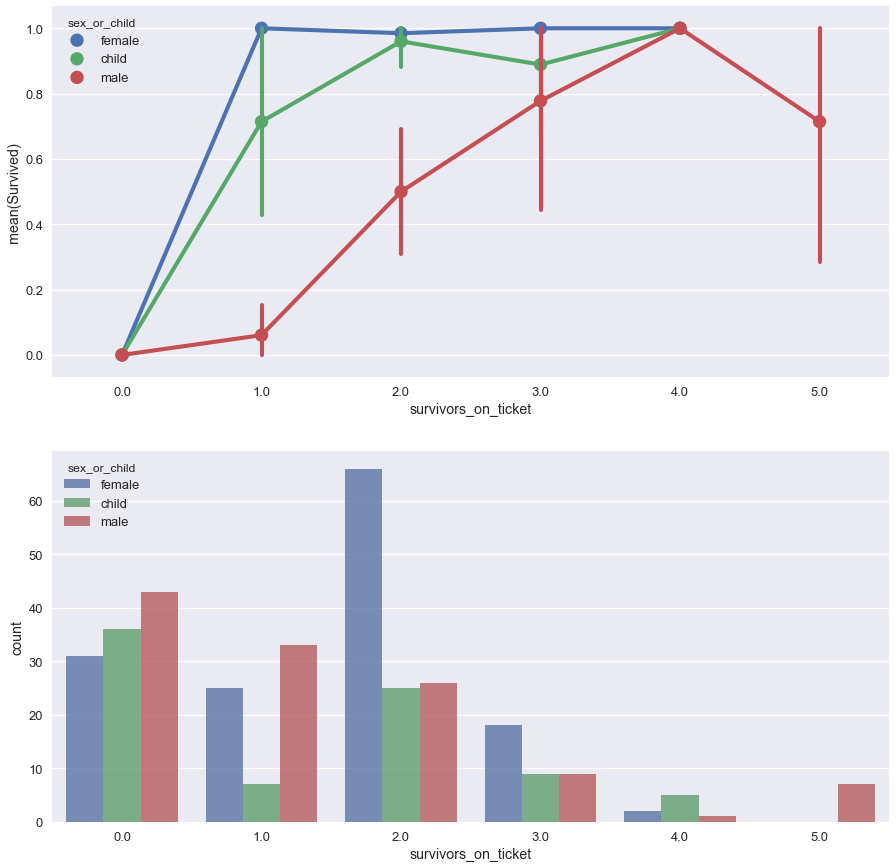

In [33]:
data_select_1 = titanic_data.loc[titanic_data['pax_on_ticket']>1]

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,15))

sns.pointplot(x='survivors_on_ticket',y='Survived', hue='sex_or_child', data=data_select_1, size=5, alpha=0.6, ax=ax1)

sns.countplot(x='survivors_on_ticket', hue="sex_or_child", data=data_select_1, alpha =0.8, ax=ax2)


Below the same data is shown split by travel class. Again the picture is clear - if there is a known survivor on the ticket, the chances of survival are much higher.

For women and children in 1st & 2nd class, a known survivor on the ticket almost guarantees survival. For men also, the presence of a known survivor increases the odds of surviving yourself.

This could be particularly valuable when attempting to model the 'test' data - if there is (in the training set) a known survivor on a particular ticket number, then there is a clear increase in the probability of that passenger also surviving.

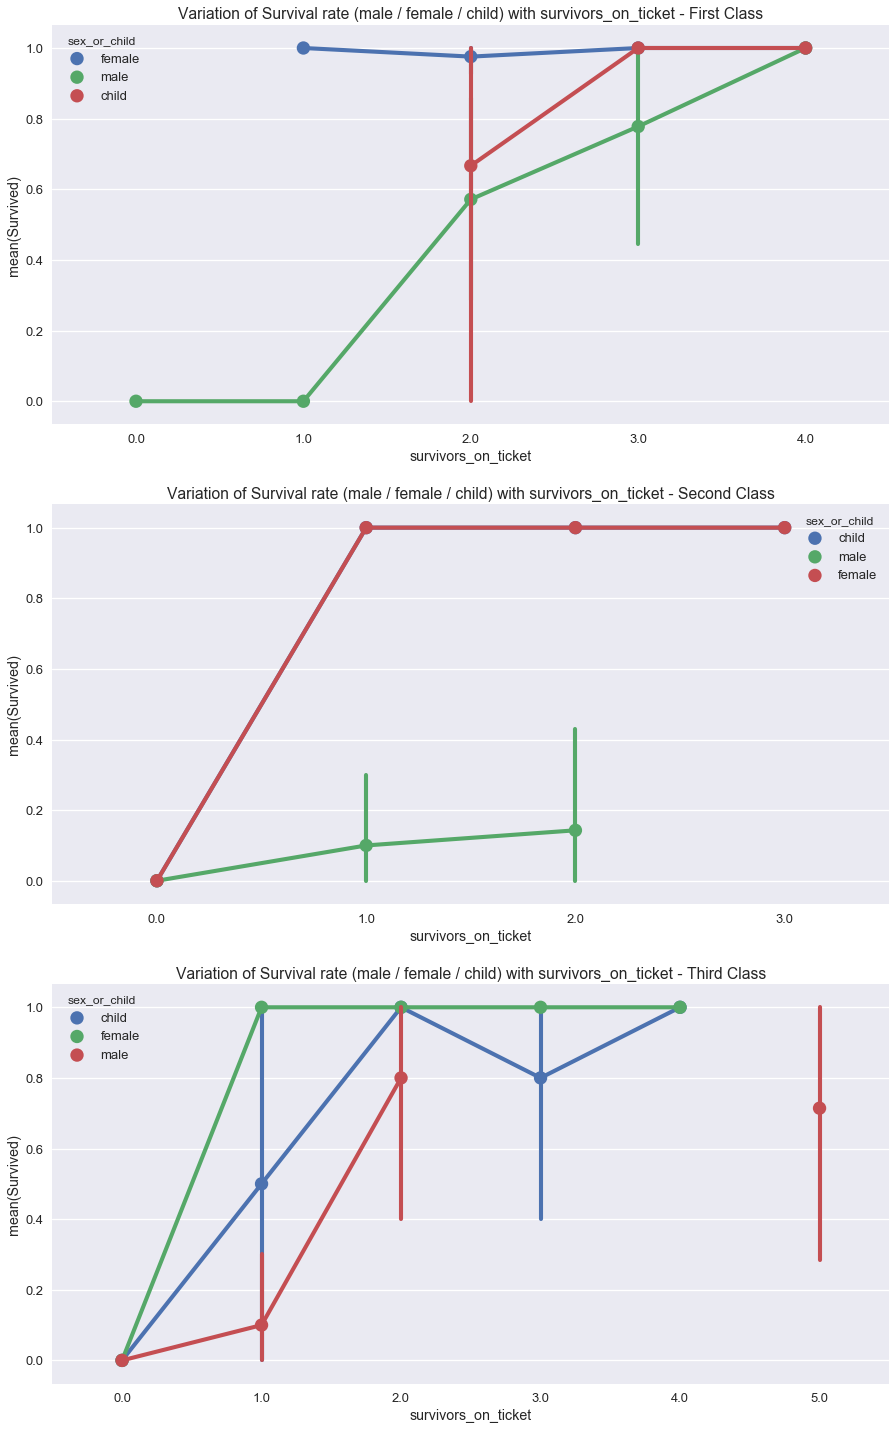

In [34]:
data_class_1 = titanic_data.loc[titanic_data['Pclass']==1].loc[titanic_data['pax_on_ticket']>1]
data_class_2 = titanic_data.loc[titanic_data['Pclass']==2].loc[titanic_data['pax_on_ticket']>1]
data_class_3 = titanic_data.loc[titanic_data['Pclass']==3].loc[titanic_data['pax_on_ticket']>1]

fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(15,25))

sns.pointplot(x='survivors_on_ticket',y='Survived', hue='sex_or_child', data=data_class_1, size=5, alpha=0.6, ax=ax1)
sns.pointplot(x='survivors_on_ticket',y='Survived', hue='sex_or_child', data=data_class_2, size=5, alpha=0.6, ax=ax2)
sns.pointplot(x='survivors_on_ticket',y='Survived', hue='sex_or_child', data=data_class_3, size=5, alpha=0.6, ax=ax3)


ax1.set_title('Variation of Survival rate (male / female / child) with survivors_on_ticket - First Class')
ax2.set_title('Variation of Survival rate (male / female / child) with survivors_on_ticket - Second Class')
ax3.set_title('Variation of Survival rate (male / female / child) with survivors_on_ticket - Third Class')

# SURVIVAL FACTORS - CONCLUSIONS

## Key survival factors

Based on all the assessments above, a subset of variables have been chosen to consider an overall corrlation matrix:

- Gender / child status
- Travel class
- Embarkation port
- Age
- Pax on ticket
- Known survivor on ticket

The 'categorical' variables (true/false) have been chosen as 'variants' against a 'baseline' assumption of a 3rd class male passenger boarding at Southampton.

The overall correlation heatmap is shown below, and paints a clear picture:
- The strongest influence on survival (PearsonR - 0.72) is the presence of a know survivor on the same ticket#
- After that, being female (0.54) and being First class (0.29) are next most important
- Then the more surprising sequence of importance is 'embarked in Cherbourg' (0.17) and being a child (assumed)(0.1),a and being second class (0.093)




,Survived,is_first_class,is_second_class,Age,is_female,is_child_assume,embarked_C,embarked_Q,pax_on_ticket,survivors_on_ticket
Survived,1.000000,0.285904,0.093349,-0.077221,0.543351,0.103673,0.168240,0.003650,0.045156,0.724297
is_first_class,0.285904,1.000000,-0.288585,0.348941,0.098013,-0.140647,0.296423,-0.155342,0.039722,0.335849
is_second_class,0.093349,-0.288585,1.000000,0.006954,0.064746,-0.014463,-0.125416,-0.127301,-0.056124,0.034533
Age,-0.077221,0.348941,0.006954,1.000000,-0.093254,-0.603069,0.036261,-0.022405,-0.257962,-0.084892
is_female,0.543351,0.098013,0.064746,-0.093254,1.000000,0.115943,0.082853,0.074115,0.159236,0.363076
is_child_assume,0.103673,-0.140647,-0.014463,-0.603069,0.115943,1.000000,0.002261,-0.030431,0.432961,0.146230
embarked_C,0.168240,0.296423,-0.125416,0.036261,0.082853,0.002261,1.000000,-0.148258,-0.022961,0.182622
embarked_Q,0.003650,-0.155342,-0.127301,-0.022405,0.074115,-0.030431,-0.148258,1.000000,-0.072088,-0.069378
pax_on_ticket,0.045156,0.039722,-0.056124,-0.257962,0.159236,0.432961,-0.022961,-0.072088,1.000000,0.386638
survivors_on_ticket,0.724297,0.335849,0.034533,-0.084892,0.363076,0.146230,0.182622,-0.069378,0.386638,1.000000


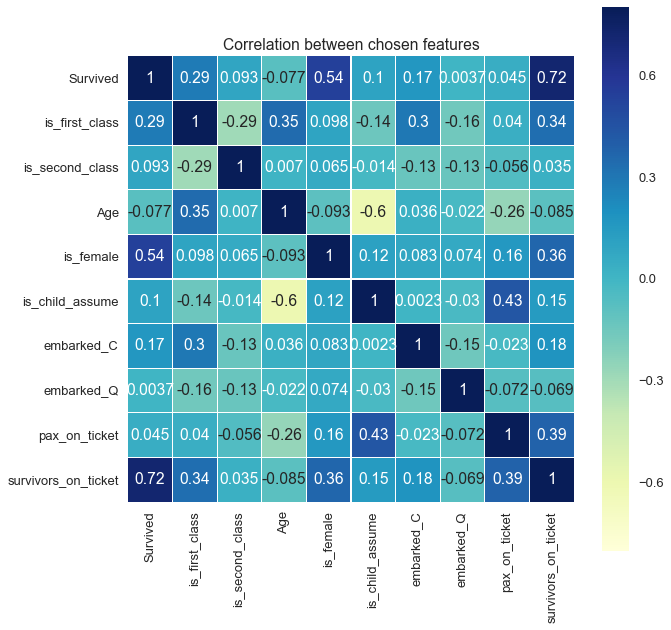

In [35]:
titanic_data_select = titanic_data[[
    'Survived','is_first_class','is_second_class','Age','is_female', 
    'is_child_assume', 'embarked_C', 'embarked_Q','pax_on_ticket','survivors_on_ticket']]
#display(titanic_data_select.head())


#Correlation
correlation=titanic_data_select.corr()
plt.figure(figsize=(10, 10))

display(correlation)

sns.heatmap(correlation, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between chosen features');

## Limitations of the data

The use of all the insight from the training data in the prediction exercise on the 'test' data is based on the assumption that the 'train' data is representative of the 'test' dataset.

Whilst this appears a reasonable assumption based on what we can see, we have no knowledge of how the 'train' data was selected from the overall passenger dataset. There may have been some selection bias (intentional or unintentional) we are not aware of which might affect the result.



# MAKING SENSE OF FARES

One thing that has puzzled me throughout is the Fare data. Fares should not show as much variation as they appear to, and should correspond, generally, to some sort of fare structure, typically with a defined number of bands / ticket prices per class.

Once the full (combined) data is considered, and we look at the fare_per_ticket_pax (most representative measure of the fare for each individual, then the coherent picture you would expect does emerge.

Look at the plots below of distribution of fares (fare_per_ticket_pax) for each travel class. For the 'Train' data they show some clear spikes, but still quit a broad spread. Inclusion of the 'Combined' data reveals a clearer picture (as now the 'pax on ticket' data is calculated on a complete passenger manifest).

This combined data shows a clear pattern of individual fare largely falling into one of two clear fare bands (distribution frequency peaks) per class, with a much smaller number of passengers falling off these principle fare levels.



[(0, 250)]

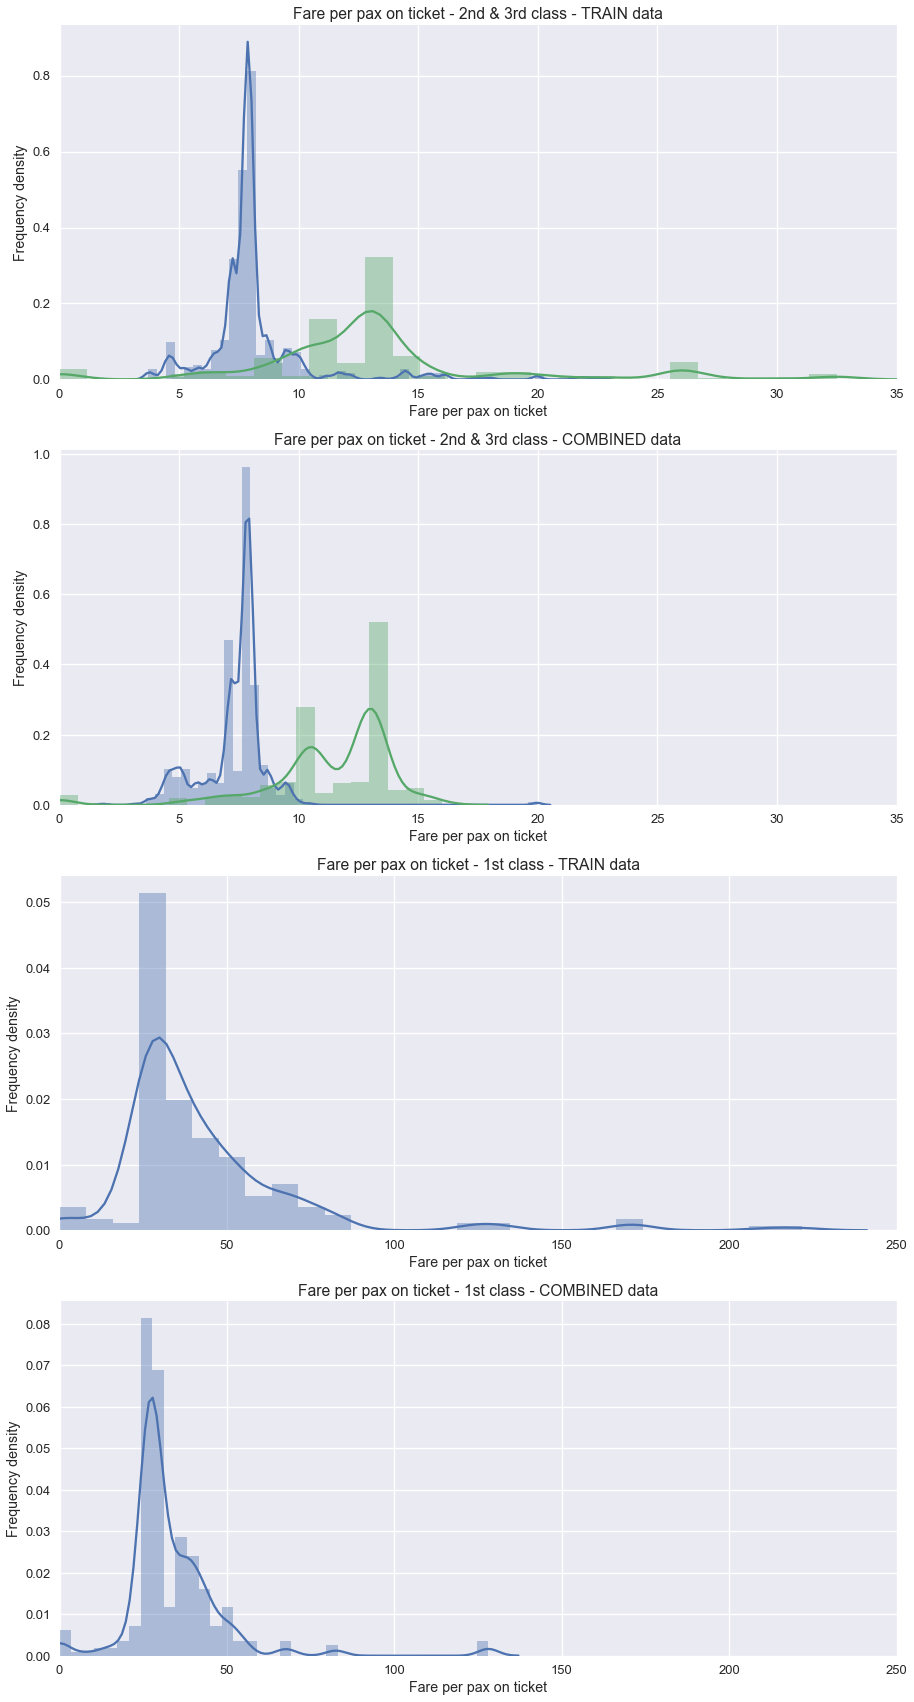

In [36]:

fig, (ax1,ax2, ax3, ax4) = plt.subplots(4,1,figsize=(15,30))

sns.distplot(titanic_data.loc[titanic_data['Pclass']==3].loc
             [titanic_data['fare_per_ticket_pax'].isnull()==False]['fare_per_ticket_pax'], ax=ax1)

sns.distplot(titanic_data.loc[titanic_data['Pclass']==2].loc
             [titanic_data['fare_per_ticket_pax'].isnull()==False]['fare_per_ticket_pax'], ax=ax1)

sns.distplot(titanic_data_combine.loc[titanic_data_combine['Pclass']==3].loc
             [titanic_data_combine['fare_per_ticket_pax'].isnull()==False]['fare_per_ticket_pax'], ax=ax2)

sns.distplot(titanic_data_combine.loc[titanic_data_combine['Pclass']==2].loc
             [titanic_data_combine['fare_per_ticket_pax'].isnull()==False]['fare_per_ticket_pax'], ax=ax2)


# Labelling ax1 & ax2
ax1.set_xlabel('Fare per pax on ticket')
ax1.set_ylabel('Frequency density')
ax2.set_xlabel('Fare per pax on ticket')
ax2.set_ylabel('Frequency density')
ax1.set_title('Fare per pax on ticket - 2nd & 3rd class - TRAIN data')
ax2.set_title('Fare per pax on ticket - 2nd & 3rd class - COMBINED data')
ax1.set(xlim=(0, 35))
ax2.set(xlim=(0, 35))

sns.distplot(titanic_data.loc[titanic_data['Pclass']==1].loc
             [titanic_data['fare_per_ticket_pax'].isnull()==False]['fare_per_ticket_pax'], ax=ax3)

sns.distplot(titanic_data_combine.loc[titanic_data_combine['Pclass']==1].loc
             [titanic_data_combine['fare_per_ticket_pax'].isnull()==False]['fare_per_ticket_pax'], ax=ax4)

# Labelling ax3 & ax4
ax3.set_xlabel('Fare per pax on ticket')
ax3.set_ylabel('Frequency density')
ax4.set_xlabel('Fare per pax on ticket')
ax4.set_ylabel('Frequency density')
ax3.set_title('Fare per pax on ticket - 1st class - TRAIN data')
ax4.set_title('Fare per pax on ticket - 1st class - COMBINED data')
ax3.set(xlim=(0, 250))
ax4.set(xlim=(0, 250))



# APPENDIX

### Age Distribution - COMBINED Data

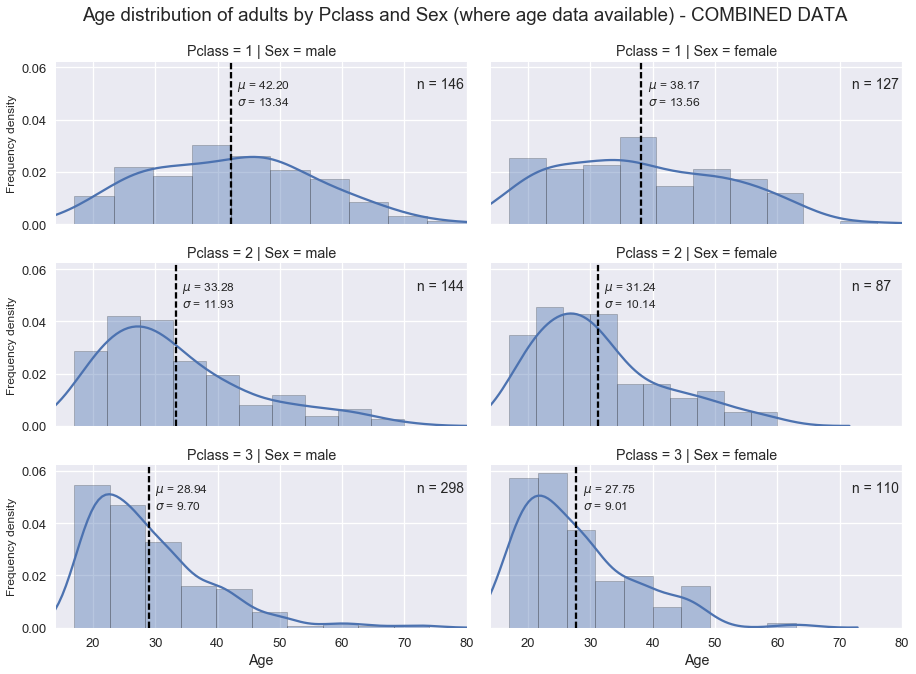

In [37]:
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid')
grid = sns.FacetGrid(titanic_data_combine.loc[titanic_data_combine['is_child_def'] == False], col='Sex', row = 'Pclass' ,size=3.2, aspect=2)
grid.map(sns.distplot, 'Age', bins=10, norm_hist=True, kde=True, hist_kws={'linewidth':0.5,'edgecolor':'k','linestyle':'-'})
grid.set(xlim=(14, titanic_data_combine['Age'].max()))

# Add vertical lines for mean age on each plot, and labels with mean & std for relevant population
# r'$...$' enables Latex notation (r is BEFORE string '  ' )
def vertical_mean_line(x, **kwargs):
    plt.axvline(x.mean(), linestyle = '--', color = 'k')
    plt.text(x.mean()+1, 0.052, r'$\mu$ = '+str('%.2f'%x.mean()), size=12)
    plt.text(x.mean()+1, 0.0455, r'$\sigma$ = '+str('%.2f'%x.std()), size=12)
    
grid.map(vertical_mean_line, 'Age') 

# Add text to each plot for relevant popultion size
for row in range(grid.axes.shape[0]):
    grid.axes[row, 0].text(72, 0.052, 'n = '+str(titanic_data_combine.loc[titanic_data_combine['Pclass']==row+1].loc[titanic_data_combine['is_child_def']==False].loc[titanic_data_combine['Age'].isnull()==False]['is_male'].sum()), size = 14)
    grid.axes[row, 1].text(72, 0.052, 'n = '+str(titanic_data_combine.loc[titanic_data_combine['Pclass']==row+1].loc[titanic_data_combine['is_child_def']==False].loc[titanic_data_combine['Age'].isnull()==False]['is_female'].sum()), size = 14)

grid.set_ylabels('Frequency density', size=12)
    
# Squash down a little and add title to facetgrid    
plt.subplots_adjust(top=0.9)
grid.fig.suptitle('Age distribution of adults by Pclass and Sex (where age data available) - COMBINED DATA') 

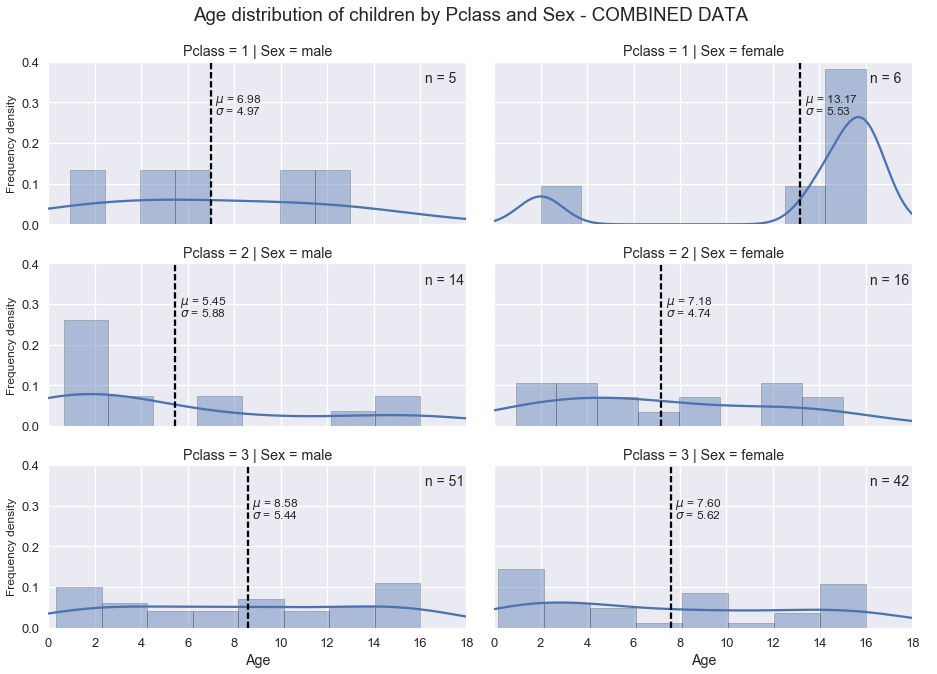

In [38]:
grid = sns.FacetGrid(titanic_data_combine.loc[titanic_data_combine['is_child_def'] == True], col='Sex', row = 'Pclass' ,size=3.2, aspect=2)
grid.map(sns.distplot, 'Age',bins=8, norm_hist=True, kde=True, hist_kws={'linewidth':0.5,'edgecolor':'k','linestyle':'-'})
grid.set(xlim=(0, 18))
grid.set_ylabels('Frequency density')
grid.add_legend()

# Add vertical lines for mean age on each plot, and labels with mean & std for relevant population
# r'$...$' enables Latex notation (r is BEFORE string '  ' )
def vertical_mean_line_child(x, **kwargs):
    plt.axvline(x.mean(), linestyle = '--', color = 'k')
    plt.text(x.mean()+.2, 0.3, r'$\mu$ = '+str('%.2f'%x.mean()), size=12)
    plt.text(x.mean()+.2, 0.27, r'$\sigma$ = '+str('%.2f'%x.std()), size=12)
    
grid.map(vertical_mean_line_child, 'Age') 

# Add text to each plot for relevant popultion size
# NOTE - don't need to filter on ['Age'].isnull() for children, as 'is_child'=True only possible for children with 'Age' data
for row in range(grid.axes.shape[0]):
    grid.axes[row, 0].text(16.2, 0.35, 'n = '+str(titanic_data_combine.loc[titanic_data_combine['Pclass']==row+1].loc[titanic_data_combine['is_child_def']==True]['is_male'].sum()), size = 14)
    grid.axes[row, 1].text(16.2, 0.35, 'n = '+str(titanic_data_combine.loc[titanic_data_combine['Pclass']==row+1].loc[titanic_data_combine['is_child_def']==True]['is_female'].sum()), size = 14)

    
grid.set_ylabels('Frequency density', size=12) 
    
plt.subplots_adjust(top=0.9)
grid.fig.suptitle('Age distribution of children by Pclass and Sex - COMBINED DATA')